===================================================================================================================

# BACKGROUND

Almost every American, it seems, gets a new credit card offer in the mail almost every week. Credit cards are highly profitable, but only if the customers stays around for a while. It **costs about 80 dollars** to **acquire a new credit card customer** who **returns about 120 dollars per year** in profit, but **only if the customers keeps the card**. If customers **drops the card after a few weeks, or doesn’t use the card**, the issuer will **lose that 80 dollars, plus some more money spent trying to reactivate them**.

Source: https://www.dbmarketing.com/articles/Art175.htm

===================================================================================================================

# DEFINE PROBLEM

- **Customer loyalty** is one of the **key** to survive in this credit card business competition
    - Source: https://www.dbmarketing.com/articles/Art175.htm
- The **cost of acquiring new customers** is estimated at **five times** the rate of **retaining existing ones**
    - Source : https://www.fpsc.com/the_cost_of_customer_churn.pdf
- In order to retain customers, we must first understanding our **Customers Type and Customers Behaviour**
- Previously, our bank **only has 1 product of credit card**, resulting **low customer loyalty** because **inaccurate marketing program**
- After do long research, our management decides to make 3 different products: **Business Unlimited (High), Business Cash (Medium), and Performance Business (Low)**
- In other hand, the company **doesn't know which customers belongs to which products**

===================================================================================================================

# DEFINE GOALS

- Understanding **Customers Type** and **Customer Behaviour** through **Customer Data Clustering**
- **Define product details** based on **Clustering Results** to ensure that customers get the proper product
- **Help Marketing Team** to define new Customers Type through **Multiclass Clasification Machine Learning Technique**

===================================================================================================================

### IMPORT COMMON PACKAGE

In [1]:
import folium
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dython
from dython.nominal import associations, cramers_v, correlation_ratio, theils_u
import dateparser
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.options.display.max_columns = 999

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.mixture import GaussianMixture

### IMPORT FILE

In [2]:
df = pd.read_csv('CC.csv')

### DATA TYPE OVERALL CHECK

In [3]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,SEGMENT
0,40.90,0.82,95.40,0.00,95.40,0.00,0.17,0.00,0.08,0.00,0,2,1000.00,201.80,139.51,0.00,12,0
1,3202.47,0.91,0.00,0.00,0.00,6442.95,0.00,0.00,0.00,0.25,4,0,7000.00,4103.03,1072.34,0.22,12,1
2,2495.15,1.00,773.17,773.17,0.00,0.00,1.00,1.00,0.00,0.00,0,12,7500.00,622.07,627.28,0.00,12,1
3,1666.67,0.64,1499.00,1499.00,0.00,205.79,0.08,0.08,0.00,0.08,1,1,7500.00,0.00,0.00,0.00,12,1
4,817.71,1.00,16.00,16.00,0.00,0.00,0.08,0.08,0.00,0.00,0,1,1200.00,678.33,244.79,0.00,12,0


### COLUMNS DESCRIPTION
Below is the definition of each features:
- `CUST_ID` - Identification of Credit Card Holder
- `BALANCE` - Balance amount left in their account to make purchases
- `BALANCE_FREQUENCY` - How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- `PURCHASES` - Amount of purchases made from account 
- `ONEOFF_PURCHASES` - Maximum purchase amount done in one-go
- `INSTALLMENTS_PURCHASES` - Amount of purchase done in installment
- `CASH_ADVANCE` - Amount of Cash Money user take from credit card
- `PURCHASES_FREQUENCY` - How frequent the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- `ONEOFF_PURCHASES_FREQUENCY` - How frequent Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- `PURCHASES_INSTALLMENTS_FREQUENCY` - How frequent purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- `CASH_ADVANCE_FREQUENCY` - How frequent user take money from credit card
- `CASH_ADVANCE_TRX` - Number of Transactions made with "Cash in Advanced" 
- `PURCHASES_TRX ` - Number of purchase transactions made 
- `CREDIT_LIMIT` - Limit of Credit Card for user
- `PAYMENTS` - Amount of Payment done by user
- `MINIMUM_PAYMENTS` - Minimum amount of payments made by user
- `PRC_FULL_PAYMENT` - Percent of full payment paid by user
- `TENURE` - Tenure of credit card service for user

Source : https://www.kaggle.com/arjunbhasin2013/ccdata

In [4]:
print(df.shape)
# The data consist of 8950 rows and 18 columns

(8949, 18)


### COLUMN SUMMARY

In [5]:
dfDesc = []
for i in df.columns:
    dfDesc.append([
        i, 
        df[i].dtypes,
        df[i].isna().sum(),
        round(((df[i].isna().sum()/ len(df)) * 100),2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

In [6]:
pd.DataFrame(data = dfDesc,
             columns = [
                 'Features', 
                 'DataType', 
                 'Null', 
                 'NullPercentage', 
                 'Unique', 
                 'Unique Sample'
             ])

,Features,DataType,Null,NullPercentage,Unique,Unique Sample
0,BALANCE,float64,0,0.00,8870,"[6262.211034, 1199.555426]"
1,BALANCE_FREQUENCY,float64,0,0.00,43,"[0.166667, 0.125]"
2,PURCHASES,float64,0,0.00,6203,"[983.77, 4266.25]"
3,ONEOFF_PURCHASES,float64,0,0.00,4014,"[253.7, 248.7]"
4,INSTALLMENTS_PURCHASES,float64,0,0.00,4452,"[310.0, 31.68]"
5,CASH_ADVANCE,float64,0,0.00,4322,"[3671.777443, 490.49300000000005]"
6,PURCHASES_FREQUENCY,float64,0,0.00,47,"[0.090909, 0.9]"
7,ONEOFF_PURCHASES_FREQUENCY,float64,0,0.00,47,"[0.416667, 0.0]"
8,PURCHASES_INSTALLMENTS_FREQUENCY,float64,0,0.00,47,"[0.454545, 0.9]"
9,CASH_ADVANCE_FREQUENCY,float64,0,0.00,54,"[0.285714, 0.545455]"


In [7]:
## df.head(), df.shape, dfDesc is utilized to capture dataset genereal information

===================================================================================================================

# DESCRIPTIVE ANALYSIS, HANDLING OUTLIERS, AND HANDLING MISSING VALUE

### DESCRIPTIVE ANALYSIS

In [8]:
round(df.describe(),2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,SEGMENT
count,8949.00,8949.00,8949.00,8949.00,8949.00,8949.00,8949.00,8949.00,8949.00,8949.00,8949.00,8949.00,8949.00,8949.00,8949.00,8949.00,8949.00,8949.00
mean,1564.65,0.88,1003.32,592.50,411.11,978.96,0.49,0.20,0.36,0.14,3.25,14.71,4494.45,1733.34,845.35,0.15,11.52,0.45
std,2081.58,0.24,2136.73,1659.97,904.38,2097.26,0.40,0.30,0.40,0.20,6.82,24.86,3638.82,2895.17,2362.43,0.29,1.34,0.63
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,50.00,0.00,0.00,0.00,6.00,0.00
25%,128.37,0.89,39.80,0.00,0.00,0.00,0.08,0.00,0.00,0.00,0.00,1.00,1600.00,383.28,164.39,0.00,12.00,0.00
50%,873.68,1.00,361.49,38.00,89.00,0.00,0.50,0.08,0.17,0.00,0.00,7.00,3000.00,857.06,295.78,0.00,12.00,0.00
75%,2054.37,1.00,1110.17,577.83,468.65,1113.87,0.92,0.30,0.75,0.22,4.00,17.00,6500.00,1901.28,794.66,0.14,12.00,1.00
max,19043.14,1.00,49039.57,40761.25,22500.00,47137.21,1.00,1.00,1.00,1.50,123.00,358.00,30000.00,50721.48,76406.21,1.00,12.00,2.00


### MISSING VALUE CHECK & HANDLING

In [9]:
df.isna().sum()
## From information below, dataset don't have missing value

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
SEGMENT                             0
dtype: int64

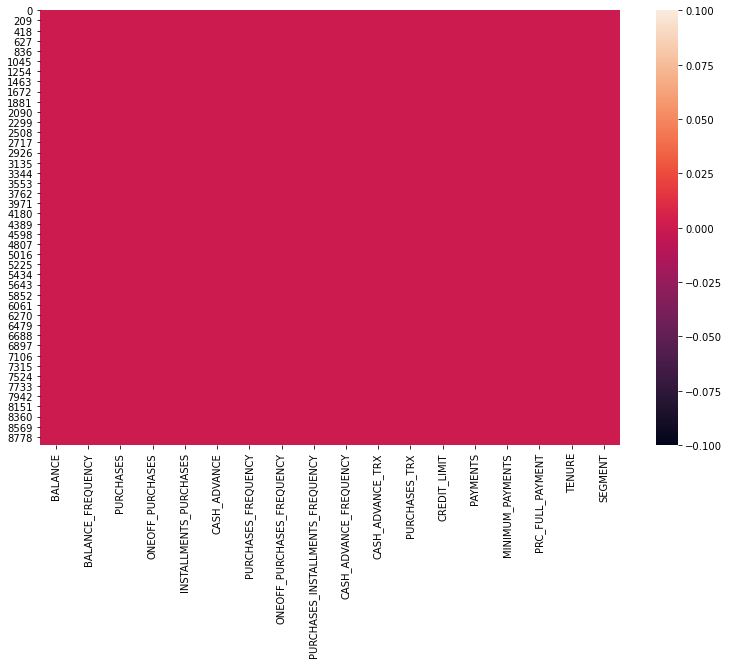

In [10]:
plt.figure(figsize=(13,8))
sns.heatmap(df.isna())
plt.show()

## DATA PREPARATION - FEATURES ENGINEERING FOR EDA

- Binning BALANCE
- Binning BALANCE_FREQUENCY
- Binning PURCHASES
- Binning ONEOFF_PURCHASES
- Binning INSTALLMENTS_PURCHASES
- Binning CASH_ADVANCE
- Binning PURCHASES_FREQUENCY
- Binning ONEOFF_PURCHASES_FREQUENCY
- Binning PURCHASES_INSTALLMENTS_FREQUENCY
- Binning CASH_ADVANCE_FREQUENCY
- Binning CASH_ADVANCE_TRX
- Binning PURCHASES_TRX
- Binning CREDIT_LIMIT
- Binning PAYMENTS
- Binning MINIMUM_PAYMENTS
- Binning PRC_FULL_PAYMENT

#### Binning BALANCE

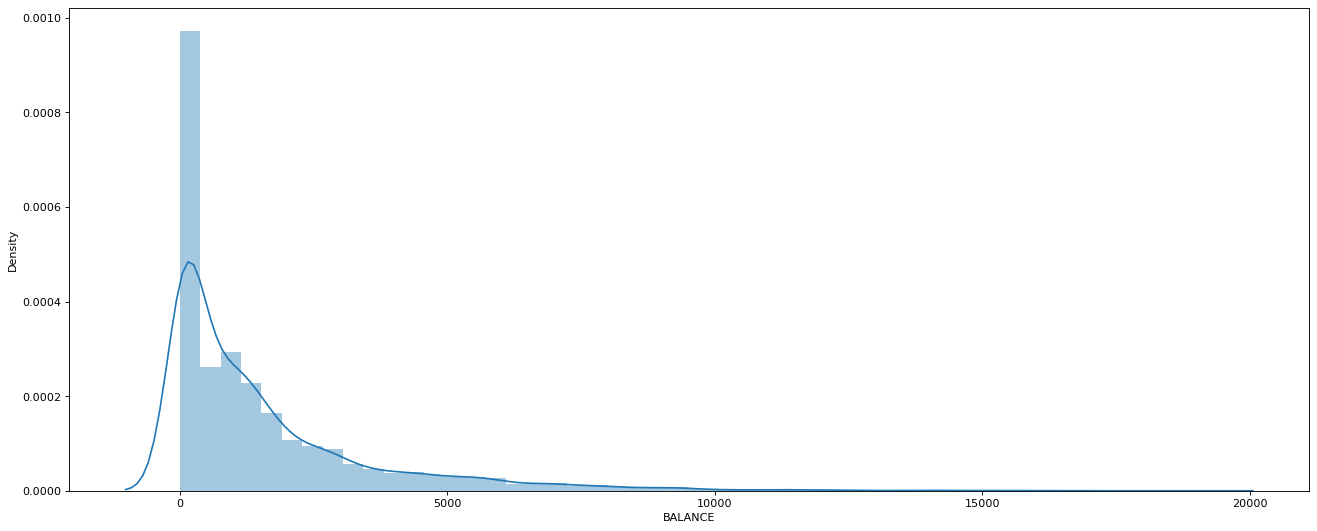

In [11]:
## BALANCE Distribution Data
plt.figure(figsize=(20,8), dpi = 80)
sns.distplot(df['BALANCE'])
plt.show()

In [12]:
df['BALANCE'].min()

0.0

In [13]:
df['BALANCE'].max()

19043.13856

In [14]:
balance_bin = [-1, 2000, 4000, 6000, 8000, 10000, df['BALANCE'].max()]
balance_label = ['0-2000', '2001-4000', '4001-6000', '6001-8000', '8001-10000', '>10001']

df['BALANCE_GROUP'] = pd.cut(df['BALANCE'], bins = balance_bin, labels = balance_label)

#### Binning BALANCE_FREQUENCY

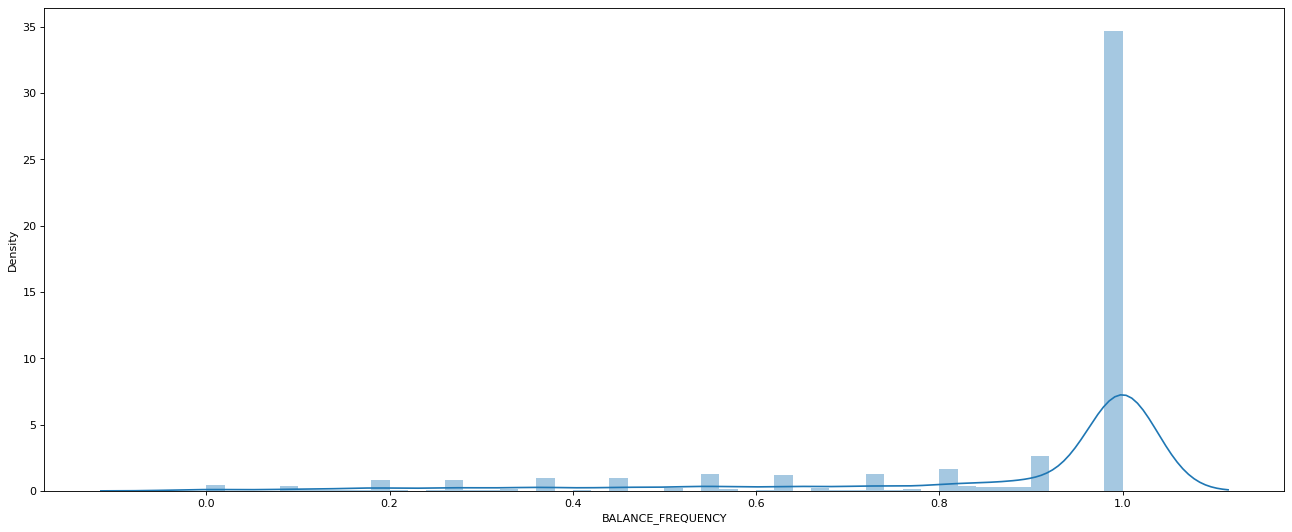

In [15]:
## BALANCE_FREQUENCY Distribution Data
plt.figure(figsize=(20,8), dpi = 80)
sns.distplot(df['BALANCE_FREQUENCY'])
plt.show()

In [16]:
df['BALANCE_FREQUENCY'].min()

0.0

In [17]:
df['BALANCE_FREQUENCY'].max()

1.0

In [18]:
balance_freq_bin = [-1, 0.2, 0.4, 0.6, 0.8, df['BALANCE_FREQUENCY'].max()]
balance_freq_label = ['0-0.2', '0.21-0.4', '0.41-0.6', '0.61-0.8', '0.81-1']

df['BALANCE_FREQ_GROUP'] = pd.cut(df['BALANCE_FREQUENCY'], bins = balance_freq_bin, labels = balance_freq_label)

#### Binning PURCHASES

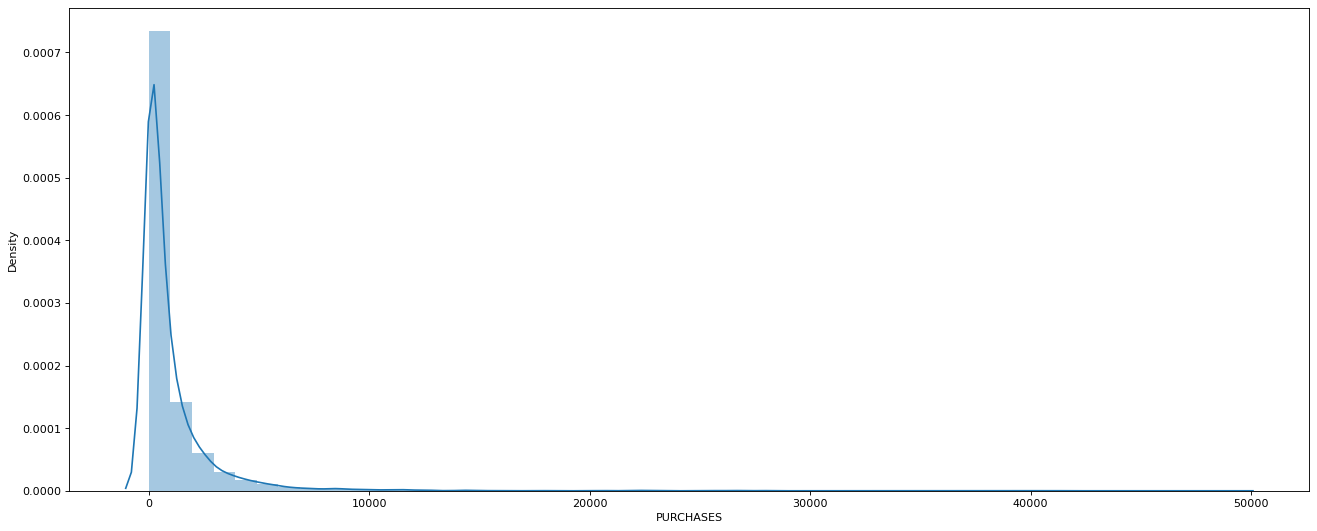

In [19]:
## PURCHASES Distribution Data
plt.figure(figsize=(20,8), dpi = 80)
sns.distplot(df['PURCHASES'])
plt.show()

In [20]:
df['PURCHASES'].min()

0.0

In [21]:
df['PURCHASES'].max()

49039.57

In [22]:
purchases_bin = [-1, 2000, 4000, 6000, 8000, 10000, df['PURCHASES'].max()]
purchases_label = ['0-2000', '2001-4000', '4001-6000', '6001-8000', '8001-10000', '>10001']

df['PURCHASES_GROUP'] = pd.cut(df['PURCHASES'], bins = purchases_bin, labels = purchases_label)

#### Binning ONEOFF_PURCHASES

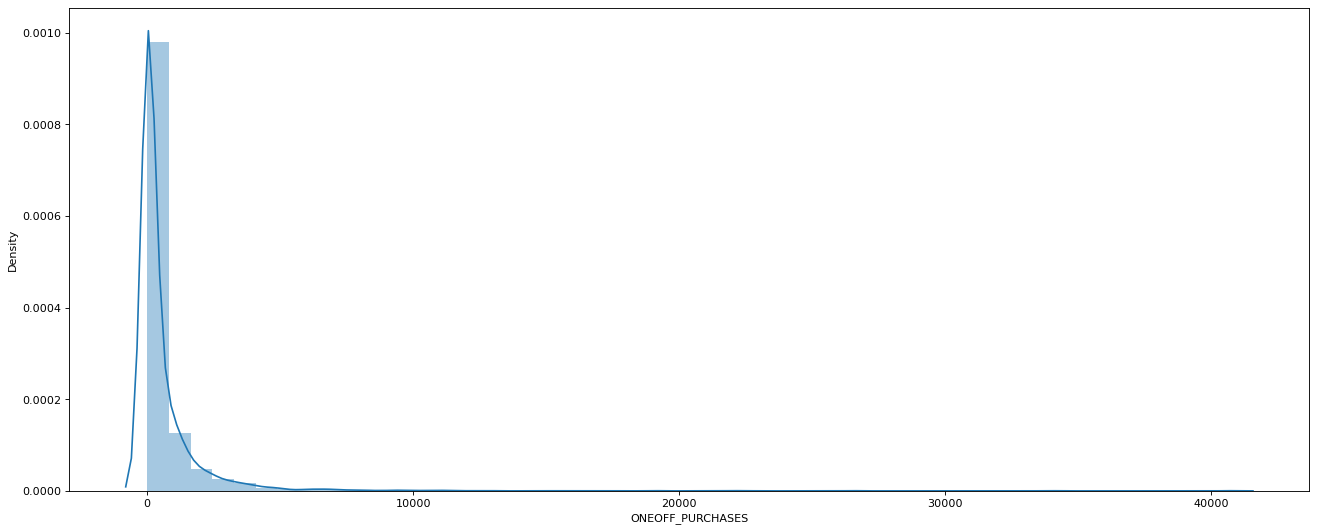

In [23]:
## ONEOFF_PURCHASES Distribution Data
plt.figure(figsize=(20,8), dpi = 80)
sns.distplot(df['ONEOFF_PURCHASES'])
plt.show()

In [24]:
df['ONEOFF_PURCHASES'].min()

0.0

In [25]:
df['ONEOFF_PURCHASES'].max()

40761.25

In [26]:
oneoff_purchases_bin = [-1, 2000, 4000, 6000, 8000, 10000, df['ONEOFF_PURCHASES'].max()]
oneoff_purchases_label = ['0-2000', '2001-4000', '4001-6000', '6001-8000', '8001-10000', '>10001']

df['ONEOFF_PURCHASES_GROUP'] = pd.cut(df['ONEOFF_PURCHASES'], bins = oneoff_purchases_bin, labels = oneoff_purchases_label)

#### Binning INSTALLMENTS_PURCHASES

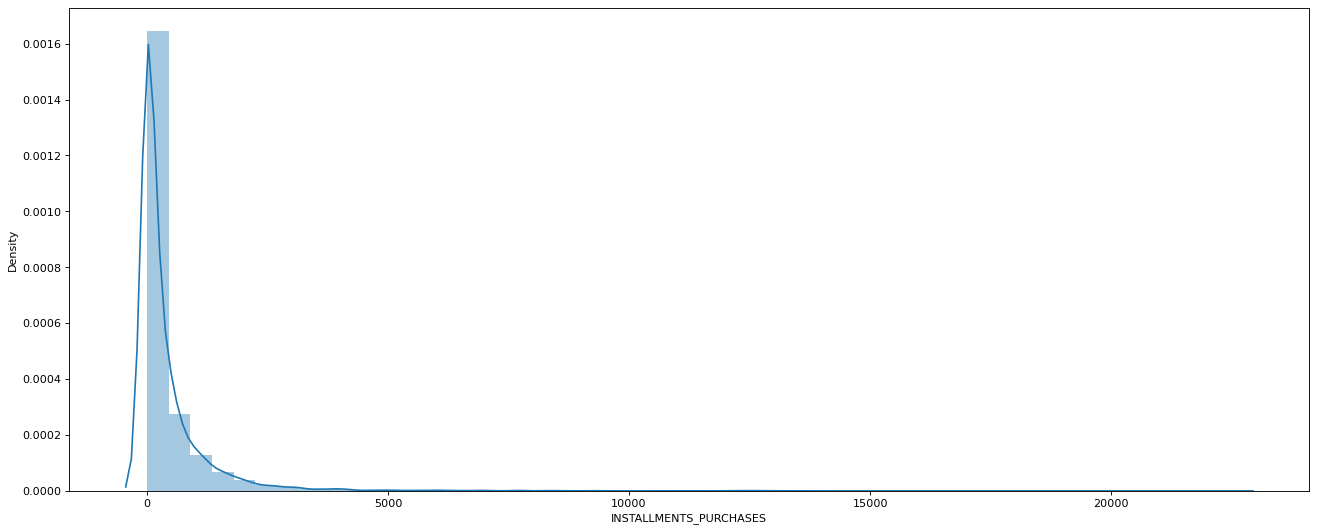

In [27]:
## INSTALLMENTS_PURCHASES Distribution Data
plt.figure(figsize=(20,8), dpi = 80)
sns.distplot(df['INSTALLMENTS_PURCHASES'])
plt.show()

In [28]:
df['INSTALLMENTS_PURCHASES'].min()

0.0

In [29]:
df['INSTALLMENTS_PURCHASES'].max()

22500.0

In [30]:
installments_purchases_bin = [-1, 2000, 4000, 6000, 8000, 10000, df['INSTALLMENTS_PURCHASES'].max()]
installments_purchases_label = ['0-2000', '2001-4000', '4001-6000', '6001-8000', '8001-10000', '>10001']

df['INSTALLMENTS_PURCHASES_GROUP'] = pd.cut(df['INSTALLMENTS_PURCHASES'], bins = installments_purchases_bin, labels = installments_purchases_label)

#### Binning CASH_ADVANCE

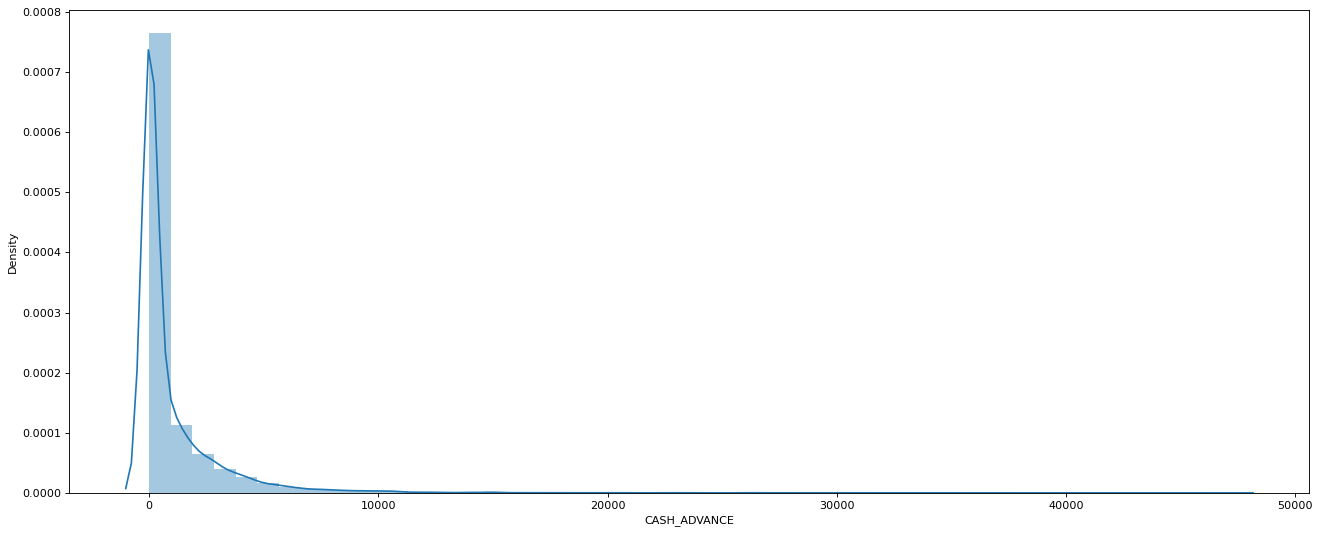

In [31]:
## CASH_ADVANCE Distribution Data
plt.figure(figsize=(20,8), dpi = 80)
sns.distplot(df['CASH_ADVANCE'])
plt.show()

In [32]:
df['CASH_ADVANCE'].min()

0.0

In [33]:
df['CASH_ADVANCE'].max()

47137.21176000001

In [34]:
cash_advance_bin = [-1, 2000, 4000, 6000, 8000, 10000, df['CASH_ADVANCE'].max()]
cash_advance_label = ['0-2000', '2001-4000', '4001-6000', '6001-8000', '8001-10000', '>10001']

df['CASH_ADVANCE_GROUP'] = pd.cut(df['CASH_ADVANCE'], bins = cash_advance_bin, labels = cash_advance_label)

#### Binning PURCHASES_FREQUENCY

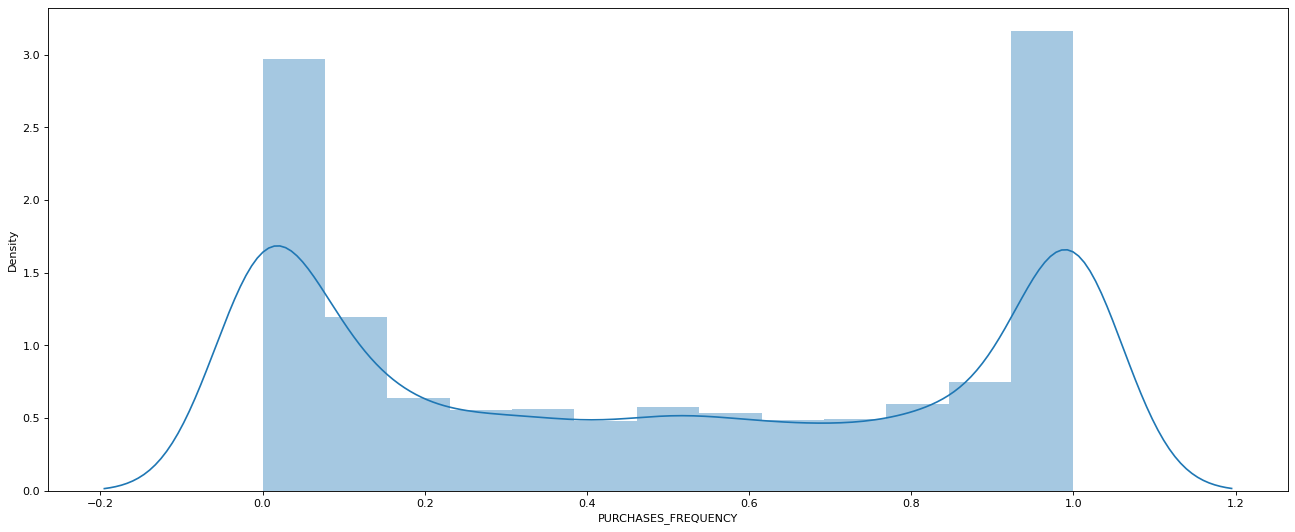

In [35]:
## PURCHASES_FREQUENCY Distribution Data
plt.figure(figsize=(20,8), dpi = 80)
sns.distplot(df['PURCHASES_FREQUENCY'])
plt.show()

In [36]:
df['PURCHASES_FREQUENCY'].min()

0.0

In [37]:
df['PURCHASES_FREQUENCY'].max()

1.0

In [38]:
purchases_freq_bin = [-1, 0.2, 0.4, 0.6, 0.8, df['PURCHASES_FREQUENCY'].max()]
purchases_freq_label = ['0-0.2', '0.21-0.4', '0.41-0.6', '0.61-0.8', '0.81-1']

df['PURCHASES_FREQ_GROUP'] = pd.cut(df['PURCHASES_FREQUENCY'], bins = purchases_freq_bin, labels = purchases_freq_label)

#### Binning ONEOFF_PURCHASES_FREQUENCY

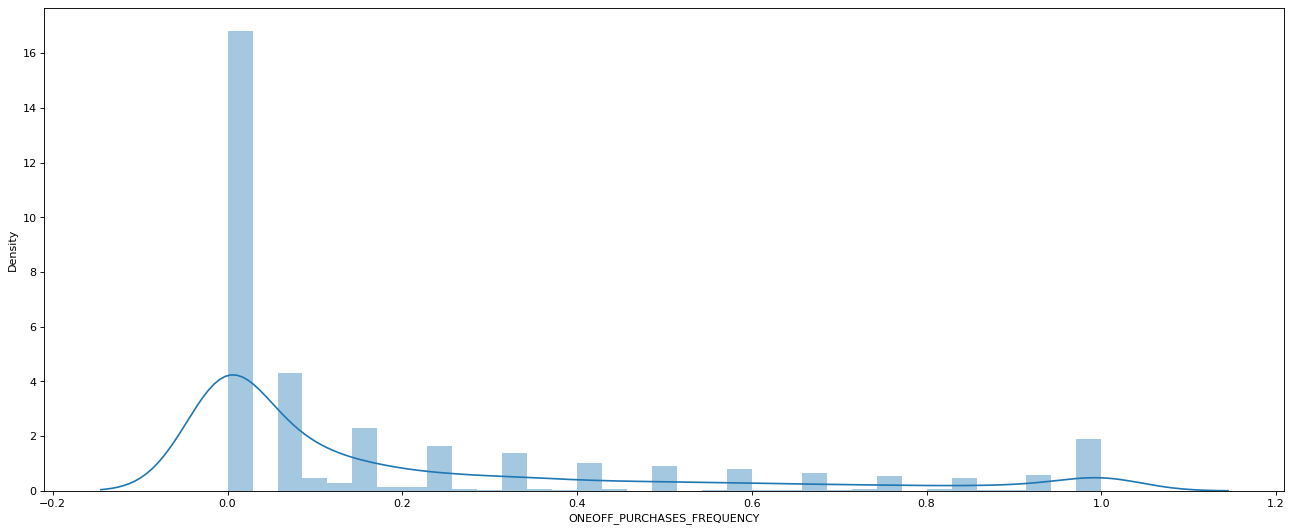

In [39]:
## ONEOFF_PURCHASES_FREQUENCY Distribution Data
plt.figure(figsize=(20,8), dpi = 80)
sns.distplot(df['ONEOFF_PURCHASES_FREQUENCY'])
plt.show()

In [40]:
df['ONEOFF_PURCHASES_FREQUENCY'].min()

0.0

In [41]:
df['ONEOFF_PURCHASES_FREQUENCY'].max()

1.0

In [42]:
oneoff_purchases_freq_bin = [-1, 0.2, 0.4, 0.6, 0.8, df['ONEOFF_PURCHASES_FREQUENCY'].max()]
oneoff_purchases_freq_label = ['0-0.2', '0.21-0.4', '0.41-0.6', '0.61-0.8', '0.81-1']

df['ONEOFF_PURCHASES_FREQ_GROUP'] = pd.cut(df['ONEOFF_PURCHASES_FREQUENCY'], bins = oneoff_purchases_freq_bin, labels = oneoff_purchases_freq_label)

#### Binning PURCHASES_INSTALLMENTS_FREQUENCY

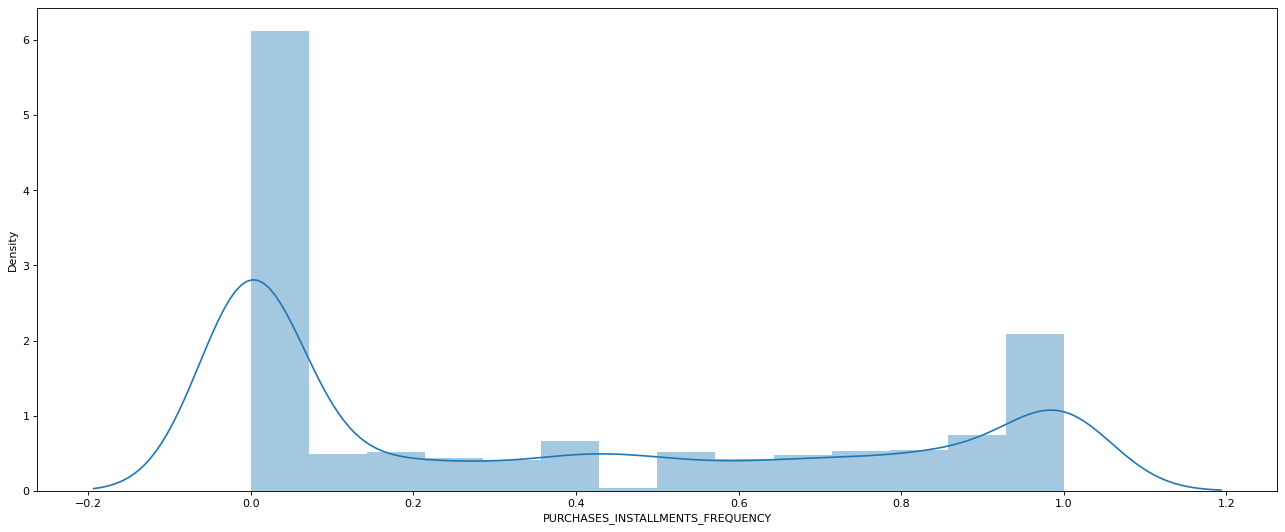

In [43]:
## PURCHASES_INSTALLMENTS_FREQUENCY Distribution Data
plt.figure(figsize=(20,8), dpi = 80)
sns.distplot(df['PURCHASES_INSTALLMENTS_FREQUENCY'])
plt.show()

In [44]:
df['PURCHASES_INSTALLMENTS_FREQUENCY'].min()

0.0

In [45]:
df['PURCHASES_INSTALLMENTS_FREQUENCY'].max()

1.0

In [46]:
purchases_installments_freq_bin = [-1, 0.2, 0.4, 0.6, 0.8, df['PURCHASES_INSTALLMENTS_FREQUENCY'].max()]
purchases_installments_freq_label = ['0-0.2', '0.21-0.4', '0.41-0.6', '0.61-0.8', '0.81-1']

df['PURCHASES_INSTALLMENTS_FREQ_GROUP'] = pd.cut(df['PURCHASES_INSTALLMENTS_FREQUENCY'], bins = purchases_installments_freq_bin, labels = purchases_installments_freq_label)

#### Binning CASH_ADVANCE_FREQUENCY

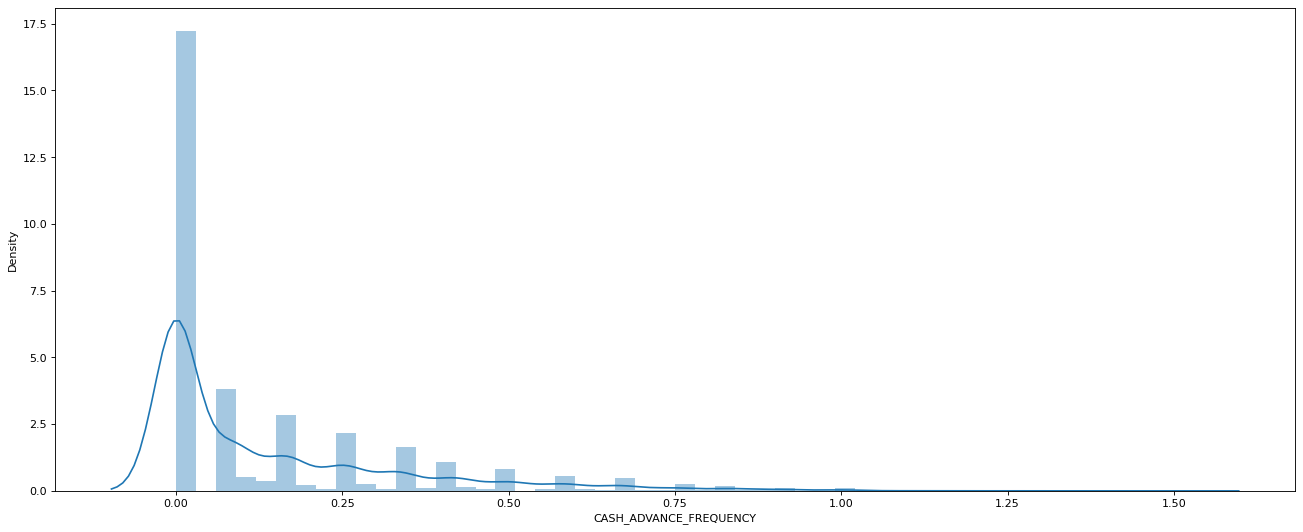

In [47]:
## CASH_ADVANCE_FREQUENCY Distribution Data
plt.figure(figsize=(20,8), dpi = 80)
sns.distplot(df['CASH_ADVANCE_FREQUENCY'])
plt.show()

In [48]:
df['CASH_ADVANCE_FREQUENCY'].min()

0.0

In [49]:
df['CASH_ADVANCE_FREQUENCY'].max()

1.5

In [50]:
cash_advance_freq_bin = [-1, 0.2, 0.4, 0.6, 0.8, 1, df['CASH_ADVANCE_FREQUENCY'].max()]
cash_advance_freq_label = ['0-0.2', '0.21-0.4', '0.41-0.6', '0.61-0.8', '0.81-1', '>1.1']

df['CASH_ADVANCE_FREQ_GROUP'] = pd.cut(df['CASH_ADVANCE_FREQUENCY'], bins = cash_advance_freq_bin, labels = cash_advance_freq_label)

#### Binning CASH_ADVANCE_TRX

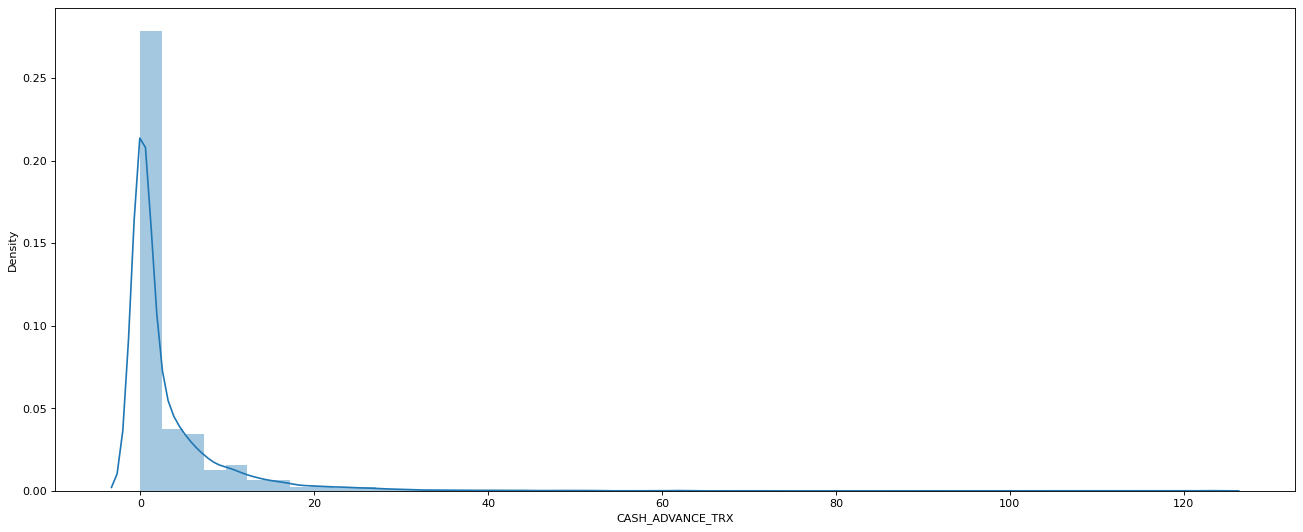

In [51]:
## CASH_ADVANCE_TRX Distribution Data
plt.figure(figsize=(20,8), dpi = 80)
sns.distplot(df['CASH_ADVANCE_TRX'])
plt.show()

In [52]:
df['CASH_ADVANCE_TRX'].min()

0

In [53]:
df['CASH_ADVANCE_TRX'].max()

123

In [54]:
cash_advance_trx_bin = [-1, 5, 10, 15, 20, 25, 30, 35, 40, 45, df['CASH_ADVANCE_TRX'].max()]
cash_advance_trx_label = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '>45']

df['CASH_ADVANCE_TRX_GROUP'] = pd.cut(df['CASH_ADVANCE_TRX'], bins = cash_advance_trx_bin, labels = cash_advance_trx_label)

#### Binning PURCHASES_TRX

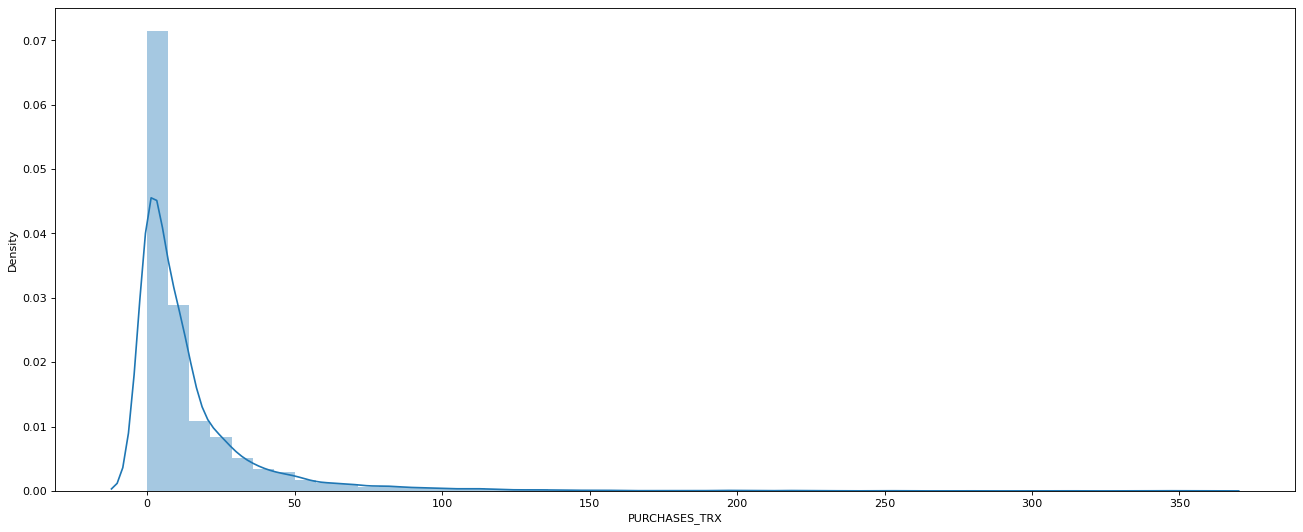

In [55]:
## PURCHASES_TRX Distribution Data
plt.figure(figsize=(20,8), dpi = 80)
sns.distplot(df['PURCHASES_TRX'])
plt.show()

In [56]:
df['PURCHASES_TRX'].min()

0

In [57]:
df['PURCHASES_TRX'].max()

358

In [58]:
purchases_trx_bin = [-1, 15, 30, 45, 60, 75, 90, 105, 120, 135, df['PURCHASES_TRX'].max()]
purchases_trx_label = ['0-15', '16-30', '31-45', '46-60', '61-75', '76-90', '91-105', '106-120', '121-135', '>135']

df['PURCHASES_TRX_GROUP'] = pd.cut(df['PURCHASES_TRX'], bins = purchases_trx_bin, labels = purchases_trx_label)

#### Binning CREDIT_LIMIT

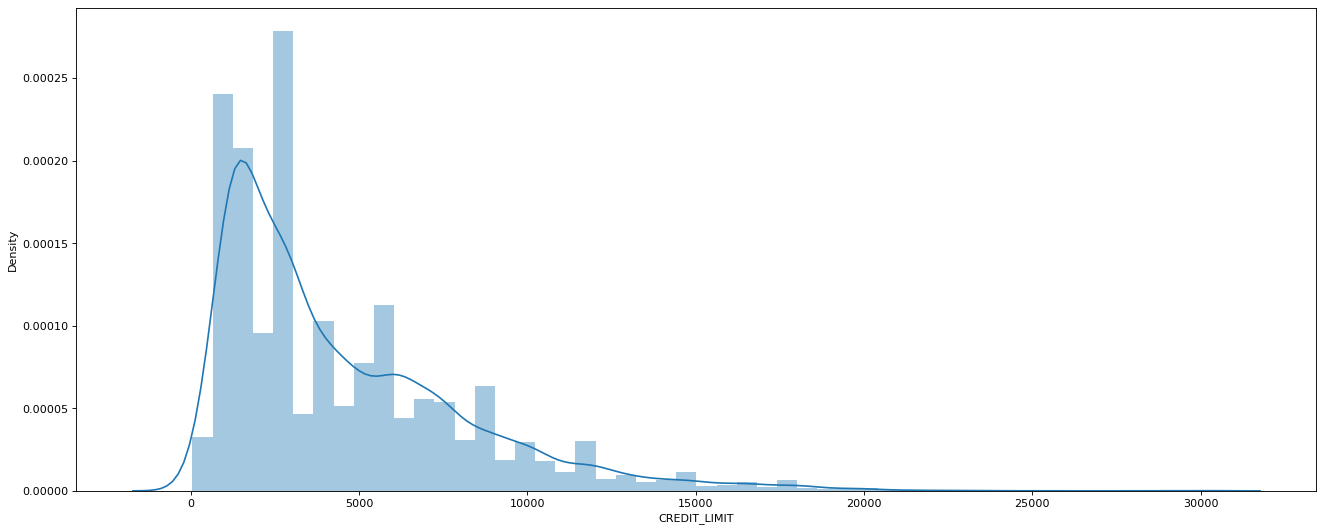

In [59]:
## CREDIT_LIMIT Distribution Data
plt.figure(figsize=(20,8), dpi = 80)
sns.distplot(df['CREDIT_LIMIT'])
plt.show()

In [60]:
df['CREDIT_LIMIT'].min()

50.0

In [61]:
df['CREDIT_LIMIT'].max()

30000.0

In [62]:
credit_limit_bin = [-1, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000, 20000, df['CREDIT_LIMIT'].max()]
credit_limit_label = ['0-2000', '2001-4000', '4001-6000', '6001-8000', '8001-10000', '10001-12000', '12001-14000', '14001-16000', '16001-18000', '18001-20000', '>20000']

df['CREDIT_LIMIT_GROUP'] = pd.cut(df['CREDIT_LIMIT'], bins = credit_limit_bin, labels = credit_limit_label)

#### Binning PAYMENTS

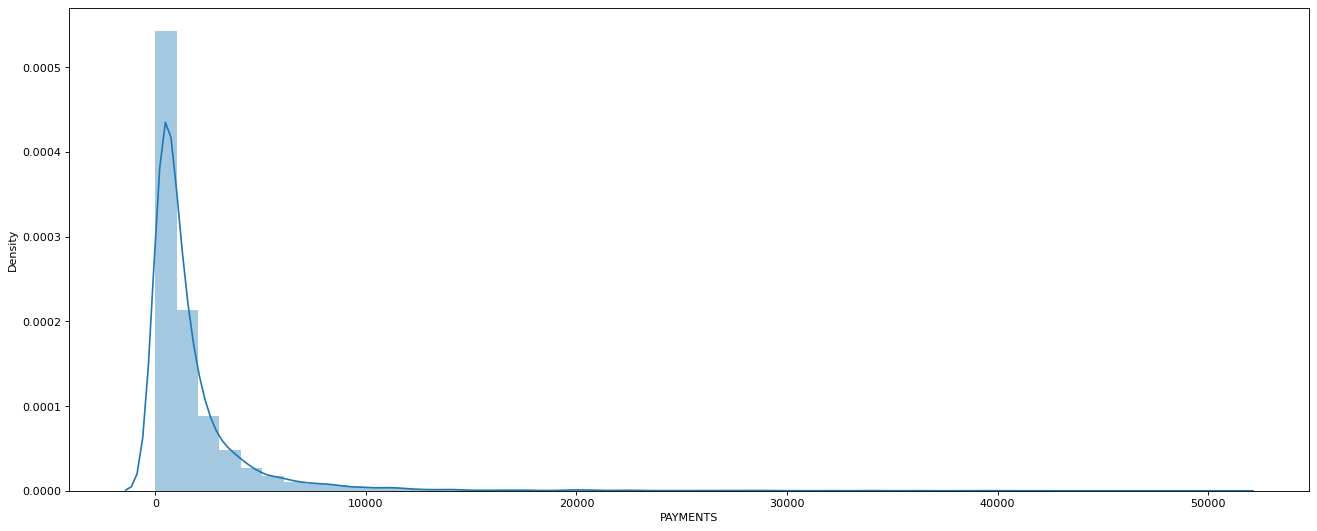

In [63]:
## PAYMENTS Distribution Data
plt.figure(figsize=(20,8), dpi = 80)
sns.distplot(df['PAYMENTS'])
plt.show()

In [64]:
df['PAYMENTS'].min()

0.0

In [65]:
df['PAYMENTS'].max()

50721.48336000001

In [66]:
payments_bin = [-1, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000, 20000, df['PAYMENTS'].max()]
payments_label = ['0-2000', '2001-4000', '4001-6000', '6001-8000', '8001-10000', '10001-12000', '12001-14000', '14001-16000', '16001-18000', '18001-20000', '>20000']

df['PAYMENTS_GROUP'] = pd.cut(df['PAYMENTS'], bins = payments_bin, labels = payments_label)

#### Binning MINIMUM_PAYMENTS

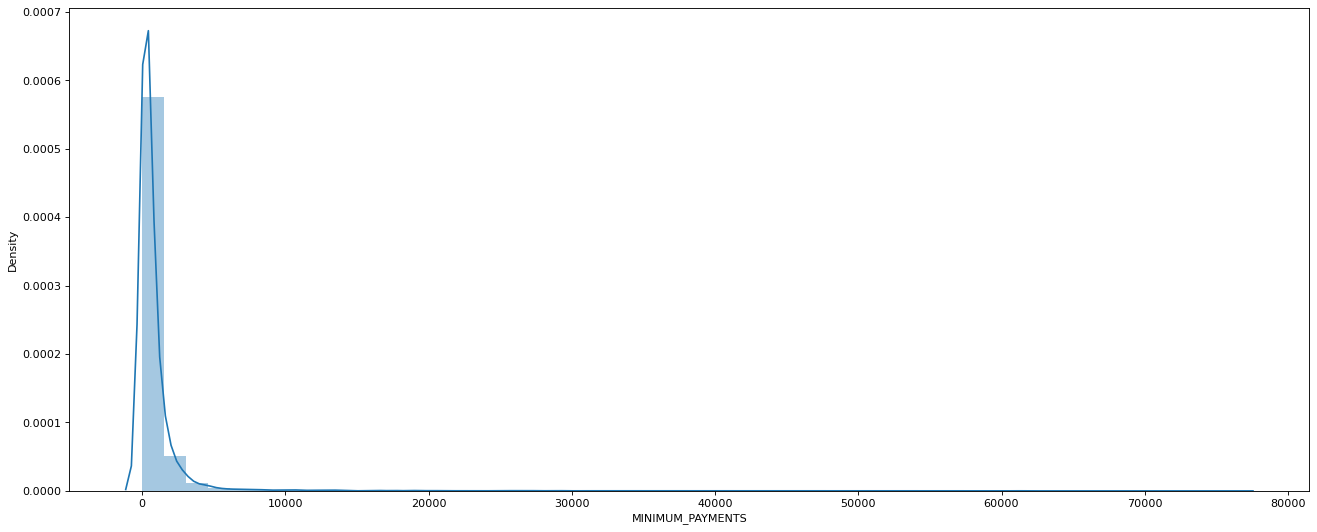

In [67]:
## MINIMUM_PAYMENTS Distribution Data
plt.figure(figsize=(20,8), dpi = 80)
sns.distplot(df['MINIMUM_PAYMENTS'])
plt.show()

In [68]:
df['MINIMUM_PAYMENTS'].min()

0.0

In [69]:
df['MINIMUM_PAYMENTS'].max()

76406.20752000001

In [70]:
minimum_payments_bin = [-1, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000, 20000, df['MINIMUM_PAYMENTS'].max()]
minimum_payments_label = ['0-2000', '2001-4000', '4001-6000', '6001-8000', '8001-10000', '10001-12000', '12001-14000', '14001-16000', '16001-18000', '18001-20000', '>20000']

df['MIN_PAYMENTS_GROUP'] = pd.cut(df['MINIMUM_PAYMENTS'], bins = minimum_payments_bin, labels = minimum_payments_label)

#### Binning PRC_FULL_PAYMENT

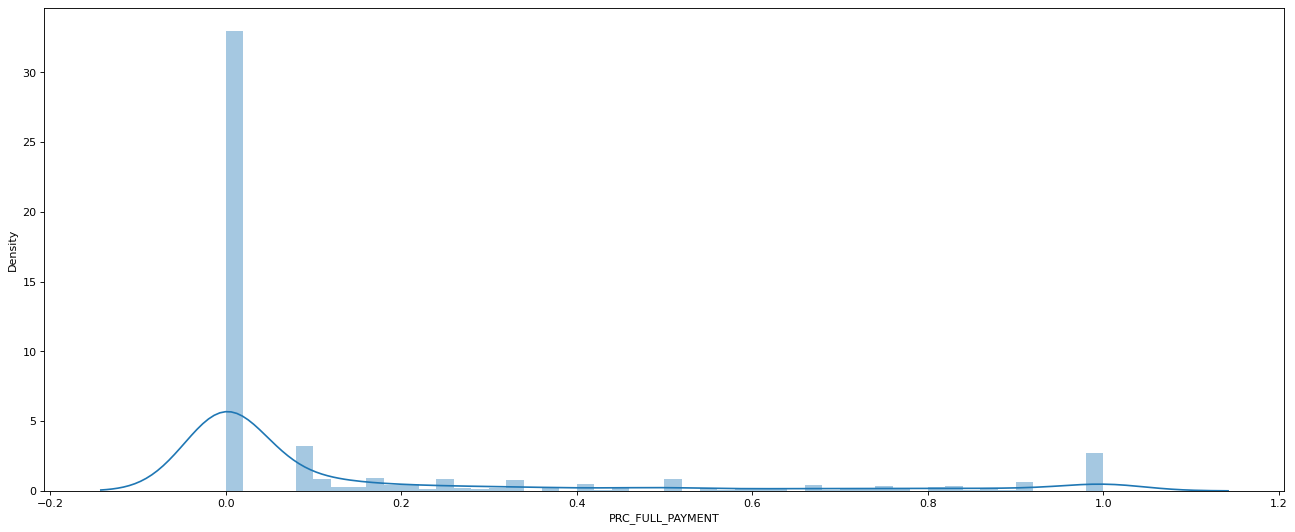

In [71]:
## PRC_FULL_PAYMENT Distribution Data
plt.figure(figsize=(20,8), dpi = 80)
sns.distplot(df['PRC_FULL_PAYMENT'])
plt.show()

In [72]:
df['PRC_FULL_PAYMENT'].min()

0.0

In [73]:
df['PRC_FULL_PAYMENT'].max()

1.0

In [74]:
prc_full_payment_bin = [-1, 0.2, 0.4, 0.6, 0.8, df['PRC_FULL_PAYMENT'].max()]
prc_full_payment_label = ['0-0.2', '0.21-0.4', '0.41-0.6', '0.61-0.8', '0.81-1']

df['PRC_FULL_PAYMENT_GROUP'] = pd.cut(df['PRC_FULL_PAYMENT'], bins = prc_full_payment_bin, labels = prc_full_payment_label)

## EXPLORATORY DATA ANALYSIS & DATA VISUALIZATION

#### Business Questions 
- What features which have impact to SEGMENT?

#### Hypothesis
- BALANCE has impact to SEGMENT
- PURCHASES has impact to SEGMENT
- ONEOFF_PURCHASES has impact to SEGMENT
- INSTALLMENT_PURCHASES has impact to SEGMENT
- CASH_ADVANCE_PURCHASES has impact to SEGMENT
- CREDIT_LIMIT has impact to SEGMENT
- PAYMENTS has impact to SEGMENT
- MINIMUM_PAYMENTS has impact to SEGMENT

### CORELLATION ANALYSIS

### Spearmen Corellation

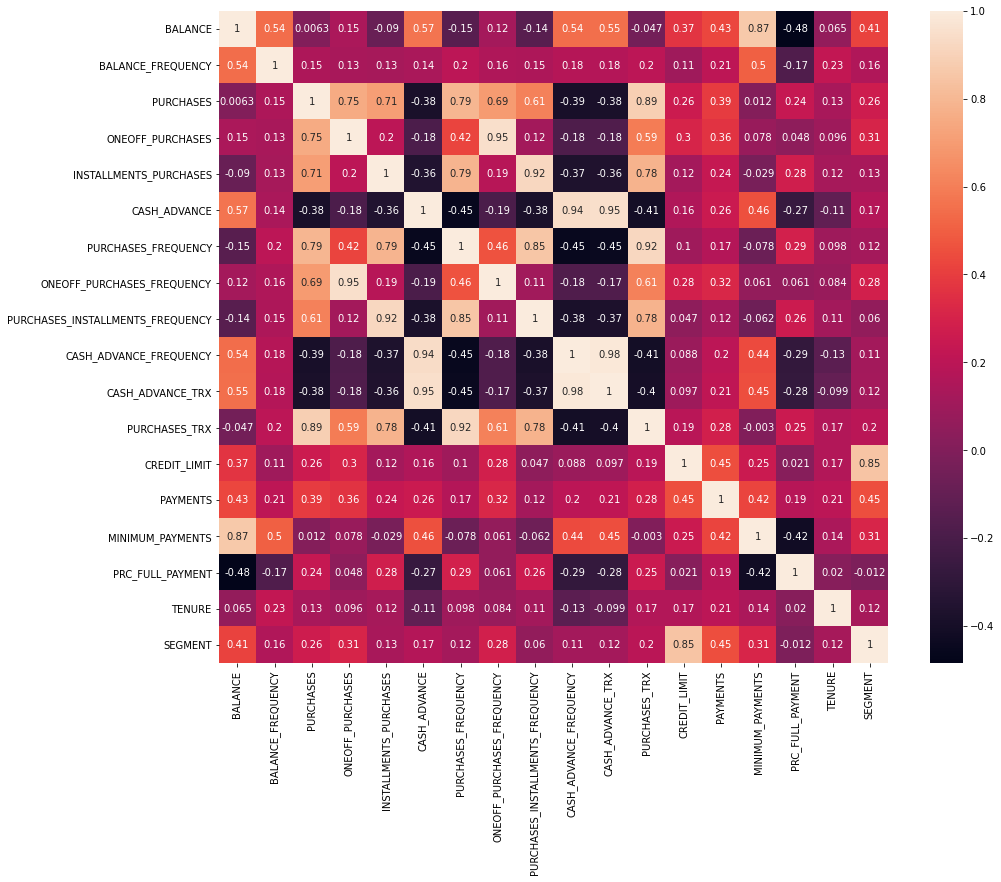

In [75]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr('spearman'), annot=True)
plt.show()

In [76]:
## To ensure corelation, further analysis will be conducted

### UNIVARIATE ANALYSIS

#### BALANCE

In [77]:
df['BALANCE_GROUP'].value_counts()

0-2000        6659
2001-4000     1282
4001-6000      588
6001-8000      244
8001-10000     110
>10001          66
Name: BALANCE_GROUP, dtype: int64

In [78]:
df['BALANCE_GROUP'].value_counts(normalize=True)

0-2000       0.74
2001-4000    0.14
4001-6000    0.07
6001-8000    0.03
8001-10000   0.01
>10001       0.01
Name: BALANCE_GROUP, dtype: float64

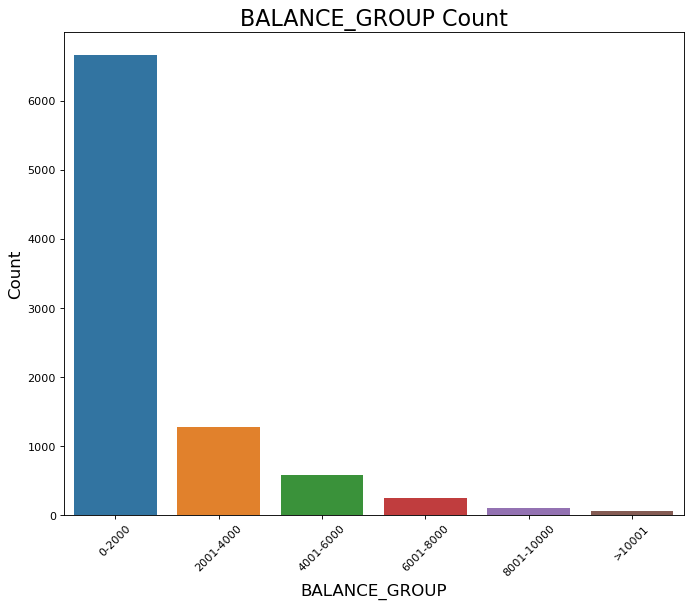

In [79]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df['BALANCE_GROUP'])
plt.title('BALANCE_GROUP Count', size =20)
plt.xlabel("BALANCE_GROUP",size = 15)
plt.ylabel("Count", size = 15)
plt.xticks(rotation=45)
plt.show()

- Majority Customer's (74%) remaining BALANCE on their credit card are around 0-2000 dollars

#### BALANCE_FREQUENCY

In [80]:
df['BALANCE_FREQ_GROUP'].value_counts()

0.81-1      7175
0.61-0.8     567
0.41-0.6     478
0.21-0.4     392
0-0.2        337
Name: BALANCE_FREQ_GROUP, dtype: int64

In [81]:
df['BALANCE_FREQ_GROUP'].value_counts(normalize=True)

0.81-1     0.80
0.61-0.8   0.06
0.41-0.6   0.05
0.21-0.4   0.04
0-0.2      0.04
Name: BALANCE_FREQ_GROUP, dtype: float64

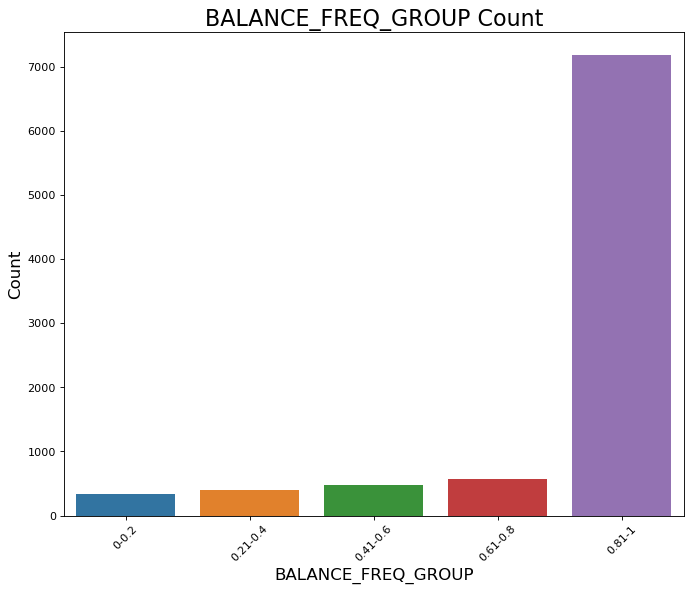

In [82]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df['BALANCE_FREQ_GROUP'])
plt.title('BALANCE_FREQ_GROUP Count', size =20)
plt.xlabel("BALANCE_FREQ_GROUP",size = 15)
plt.ylabel("Count", size = 15)
plt.xticks(rotation=45)
plt.show()

- Majority Customers (80%) are frequently updating their Credit Card Balance (0.81-1)

#### PURCHASES

In [83]:
df['PURCHASES_GROUP'].value_counts()

0-2000        7723
2001-4000      779
4001-6000      251
6001-8000       75
>10001          70
8001-10000      51
Name: PURCHASES_GROUP, dtype: int64

In [84]:
df['PURCHASES_GROUP'].value_counts(normalize=True)

0-2000       0.86
2001-4000    0.09
4001-6000    0.03
6001-8000    0.01
>10001       0.01
8001-10000   0.01
Name: PURCHASES_GROUP, dtype: float64

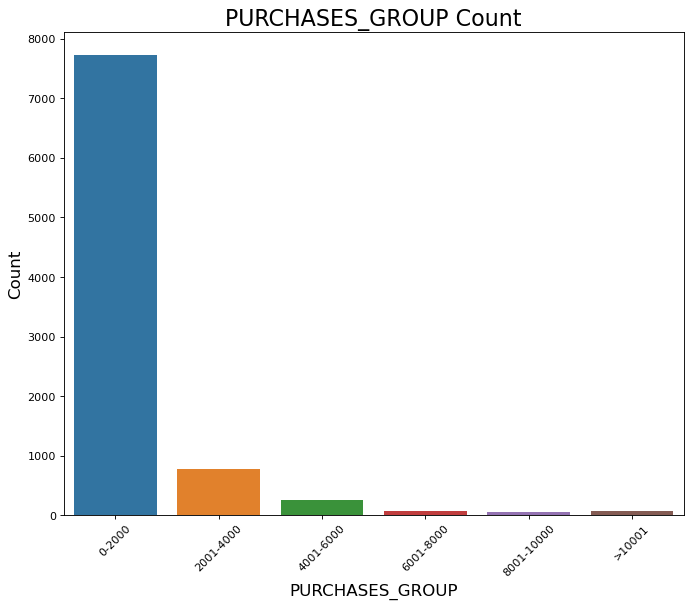

In [85]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df['PURCHASES_GROUP'])
plt.title('PURCHASES_GROUP Count', size =20)
plt.xlabel("PURCHASES_GROUP",size = 15)
plt.ylabel("Count", size = 15)
plt.xticks(rotation=45)
plt.show()

- Majority Customer's (86%) amount of purchases made are around 0-2000 dollars

#### ONEOFF_PURCHASES

In [86]:
df['ONEOFF_PURCHASES_GROUP'].value_counts()

0-2000        8258
2001-4000      472
4001-6000      107
6001-8000       52
>10001          39
8001-10000      21
Name: ONEOFF_PURCHASES_GROUP, dtype: int64

In [87]:
df['ONEOFF_PURCHASES_GROUP'].value_counts(normalize=True)

0-2000       0.92
2001-4000    0.05
4001-6000    0.01
6001-8000    0.01
>10001       0.00
8001-10000   0.00
Name: ONEOFF_PURCHASES_GROUP, dtype: float64

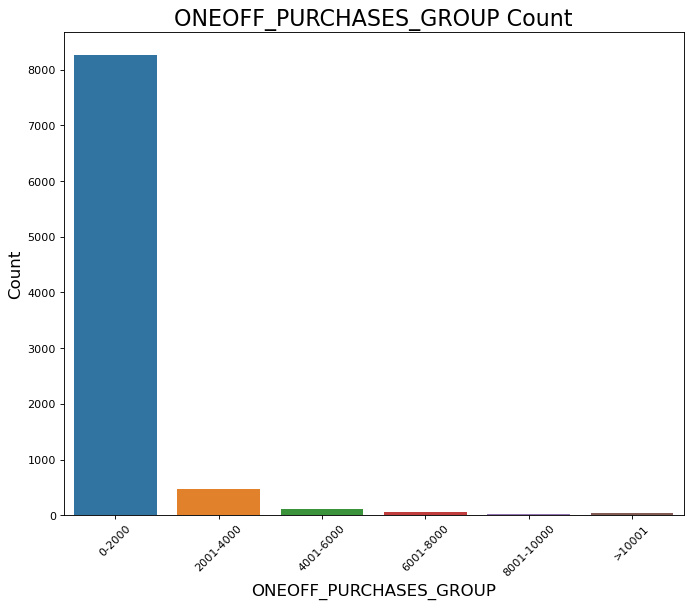

In [88]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df['ONEOFF_PURCHASES_GROUP'])
plt.title('ONEOFF_PURCHASES_GROUP Count', size =20)
plt.xlabel("ONEOFF_PURCHASES_GROUP",size = 15)
plt.ylabel("Count", size = 15)
plt.xticks(rotation=45)
plt.show()

- Majority Customer's (92%) amount of purchases made in one-go are around 0-2000 dollars

#### INSTALLMENTS_PURCHASES

In [89]:
df['INSTALLMENTS_PURCHASES_GROUP'].value_counts()

0-2000        8604
2001-4000      263
4001-6000       46
6001-8000       19
>10001          12
8001-10000       5
Name: INSTALLMENTS_PURCHASES_GROUP, dtype: int64

In [90]:
df['INSTALLMENTS_PURCHASES_GROUP'].value_counts(normalize=True)

0-2000       0.96
2001-4000    0.03
4001-6000    0.01
6001-8000    0.00
>10001       0.00
8001-10000   0.00
Name: INSTALLMENTS_PURCHASES_GROUP, dtype: float64

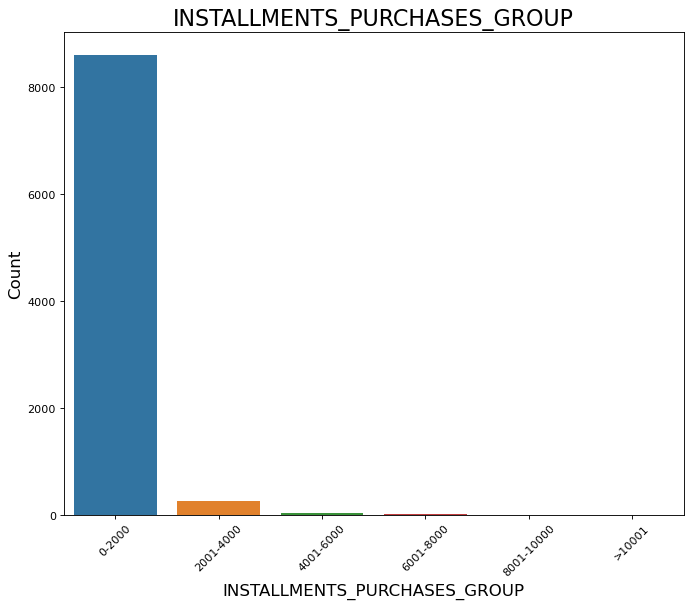

In [91]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df['INSTALLMENTS_PURCHASES_GROUP'])
plt.title('INSTALLMENTS_PURCHASES_GROUP', size =20)
plt.xlabel("INSTALLMENTS_PURCHASES_GROUP",size = 15)
plt.ylabel("Count", size = 15)
plt.xticks(rotation=45)
plt.show()

- Majority Customer's (96%) amount of purchases done in installment are around 0-2000 dollars

#### CASH_ADVANCE

In [92]:
df['CASH_ADVANCE_GROUP'].value_counts()

0-2000        7493
2001-4000      858
4001-6000      329
6001-8000      125
>10001          77
8001-10000      67
Name: CASH_ADVANCE_GROUP, dtype: int64

In [93]:
df['CASH_ADVANCE_GROUP'].value_counts(normalize=True)

0-2000       0.84
2001-4000    0.10
4001-6000    0.04
6001-8000    0.01
>10001       0.01
8001-10000   0.01
Name: CASH_ADVANCE_GROUP, dtype: float64

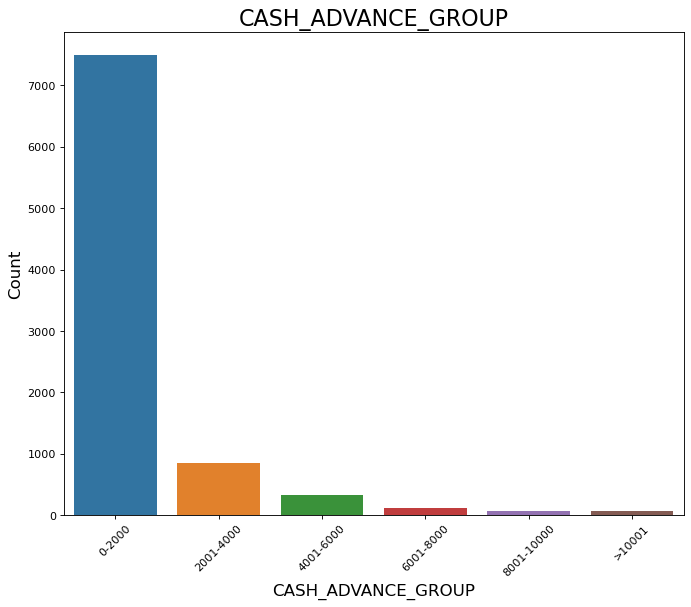

In [94]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df['CASH_ADVANCE_GROUP'])
plt.title('CASH_ADVANCE_GROUP', size =20)
plt.xlabel("CASH_ADVANCE_GROUP",size = 15)
plt.ylabel("Count", size = 15)
plt.xticks(rotation=45)
plt.show()

- Majority Customer's (84%) cash in advance are around 0-2000 dollars

#### PURCHASES_FREQ

In [95]:
df['PURCHASES_FREQ_GROUP'].value_counts()

0-0.2       3292
0.81-1      3089
0.41-0.6    1087
0.21-0.4     793
0.61-0.8     688
Name: PURCHASES_FREQ_GROUP, dtype: int64

In [96]:
df['PURCHASES_FREQ_GROUP'].value_counts(normalize=True)

0-0.2      0.37
0.81-1     0.35
0.41-0.6   0.12
0.21-0.4   0.09
0.61-0.8   0.08
Name: PURCHASES_FREQ_GROUP, dtype: float64

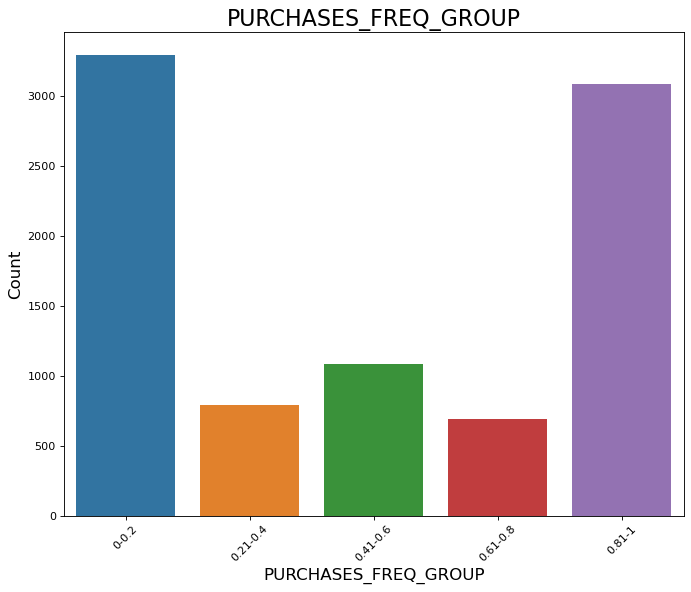

In [97]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df['PURCHASES_FREQ_GROUP'])
plt.title('PURCHASES_FREQ_GROUP', size =20)
plt.xlabel("PURCHASES_FREQ_GROUP",size = 15)
plt.ylabel("Count", size = 15)
plt.xticks(rotation=45)
plt.show()

- 37% customers rarely use credit card to made purchase (0-0.2 frequently)
- 35% customers frequent use credit card to made purchase (0.81-1 frequently)

#### ONEOFF_PURCHASES_FREQUENCY

In [98]:
df['ONEOFF_PURCHASES_FREQ_GROUP'].value_counts()

0-0.2       6257
0.21-0.4     845
0.81-1       776
0.41-0.6     729
0.61-0.8     342
Name: ONEOFF_PURCHASES_FREQ_GROUP, dtype: int64

In [99]:
df['ONEOFF_PURCHASES_FREQ_GROUP'].value_counts(normalize=True)

0-0.2      0.70
0.21-0.4   0.09
0.81-1     0.09
0.41-0.6   0.08
0.61-0.8   0.04
Name: ONEOFF_PURCHASES_FREQ_GROUP, dtype: float64

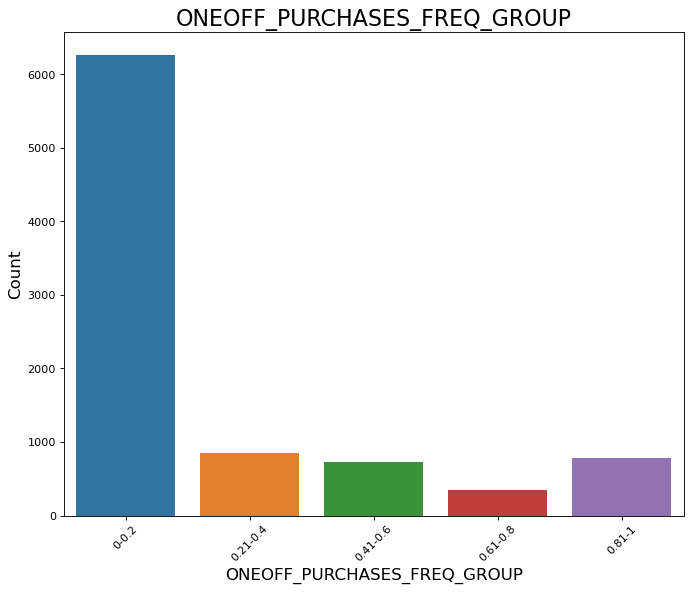

In [100]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df['ONEOFF_PURCHASES_FREQ_GROUP'])
plt.title('ONEOFF_PURCHASES_FREQ_GROUP', size =20)
plt.xlabel("ONEOFF_PURCHASES_FREQ_GROUP",size = 15)
plt.ylabel("Count", size = 15)
plt.xticks(rotation=45)
plt.show()

- Most customers (70%) rarely use credit card to made purchase in one-go (0-0.2 frequently)

#### PURCHASES_INSTALLMENTS_FREQUENCY

In [101]:
df['PURCHASES_INSTALLMENTS_FREQ_GROUP'].value_counts()

0-0.2       4555
0.81-1      2138
0.41-0.6    1002
0.61-0.8     682
0.21-0.4     572
Name: PURCHASES_INSTALLMENTS_FREQ_GROUP, dtype: int64

In [102]:
df['PURCHASES_INSTALLMENTS_FREQ_GROUP'].value_counts(normalize=True)

0-0.2      0.51
0.81-1     0.24
0.41-0.6   0.11
0.61-0.8   0.08
0.21-0.4   0.06
Name: PURCHASES_INSTALLMENTS_FREQ_GROUP, dtype: float64

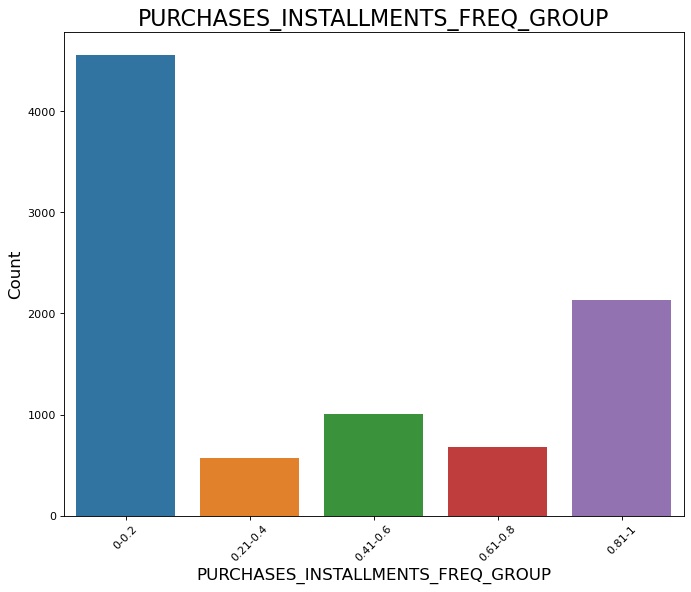

In [103]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df['PURCHASES_INSTALLMENTS_FREQ_GROUP'])
plt.title('PURCHASES_INSTALLMENTS_FREQ_GROUP', size =20)
plt.xlabel("PURCHASES_INSTALLMENTS_FREQ_GROUP",size = 15)
plt.ylabel("Count", size = 15)
plt.xticks(rotation=45)
plt.show()

- Most customers (51%) rarely do made purchases in installments (0-0.2 frequently)

#### CASH_ADVANCE_FREQUENCY

In [104]:
df['CASH_ADVANCE_FREQ_GROUP'].value_counts()

0-0.2       6704
0.21-0.4    1172
0.41-0.6     723
0.61-0.8     223
0.81-1       119
>1.1           8
Name: CASH_ADVANCE_FREQ_GROUP, dtype: int64

In [105]:
df['CASH_ADVANCE_FREQ_GROUP'].value_counts(normalize=True)

0-0.2      0.75
0.21-0.4   0.13
0.41-0.6   0.08
0.61-0.8   0.02
0.81-1     0.01
>1.1       0.00
Name: CASH_ADVANCE_FREQ_GROUP, dtype: float64

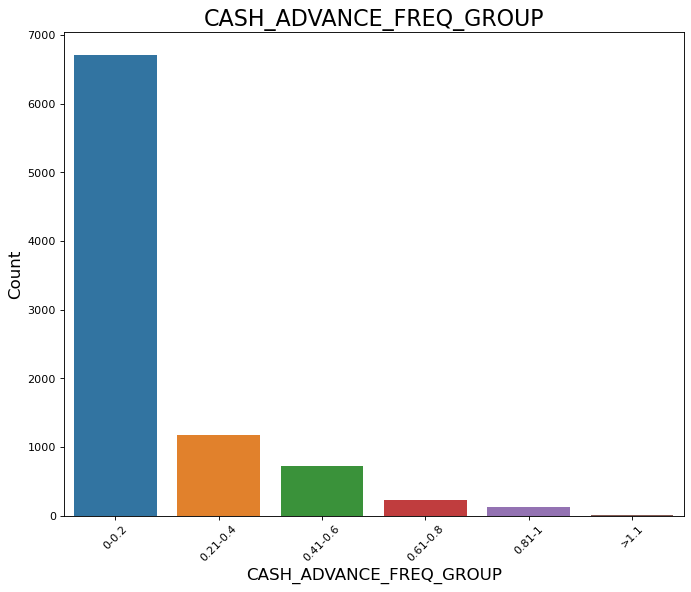

In [106]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df['CASH_ADVANCE_FREQ_GROUP'])
plt.title('CASH_ADVANCE_FREQ_GROUP', size =20)
plt.xlabel("CASH_ADVANCE_FREQ_GROUP",size = 15)
plt.ylabel("Count", size = 15)
plt.xticks(rotation=45)
plt.show()

- Most customers (75%) rarely pay the cash in advance (0-0.2 frequently)

#### CASH_ADVANCE_TRX

In [107]:
df['CASH_ADVANCE_TRX_GROUP'].value_counts()

0-5      7262
6-10      883
11-15     386
16-20     178
21-25     100
26-30      60
>45        29
31-35      24
36-40      16
41-45      11
Name: CASH_ADVANCE_TRX_GROUP, dtype: int64

In [108]:
df['CASH_ADVANCE_TRX_GROUP'].value_counts(normalize=True)

0-5     0.81
6-10    0.10
11-15   0.04
16-20   0.02
21-25   0.01
26-30   0.01
>45     0.00
31-35   0.00
36-40   0.00
41-45   0.00
Name: CASH_ADVANCE_TRX_GROUP, dtype: float64

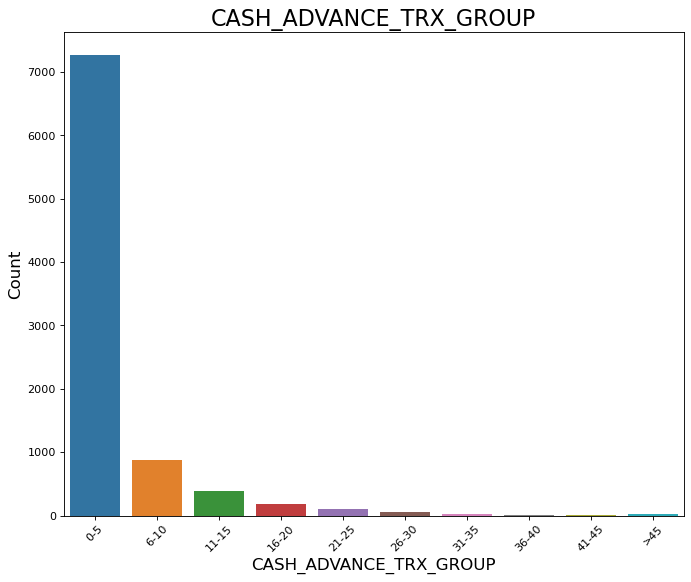

In [109]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df['CASH_ADVANCE_TRX_GROUP'])
plt.title('CASH_ADVANCE_TRX_GROUP', size =20)
plt.xlabel("CASH_ADVANCE_TRX_GROUP",size = 15)
plt.ylabel("Count", size = 15)
plt.xticks(rotation=45)
plt.show()

- Most customers (81%) made 0-5 transaction with "Cash in Advance"

#### PURCHASE_TRX

In [110]:
df['PURCHASES_TRX_GROUP'].value_counts()

0-15       6541
16-30      1224
31-45       518
46-60       258
61-75       141
76-90        87
91-105       60
>135         59
106-120      38
121-135      23
Name: PURCHASES_TRX_GROUP, dtype: int64

In [111]:
df['PURCHASES_TRX_GROUP'].value_counts(normalize=True)

0-15      0.73
16-30     0.14
31-45     0.06
46-60     0.03
61-75     0.02
76-90     0.01
91-105    0.01
>135      0.01
106-120   0.00
121-135   0.00
Name: PURCHASES_TRX_GROUP, dtype: float64

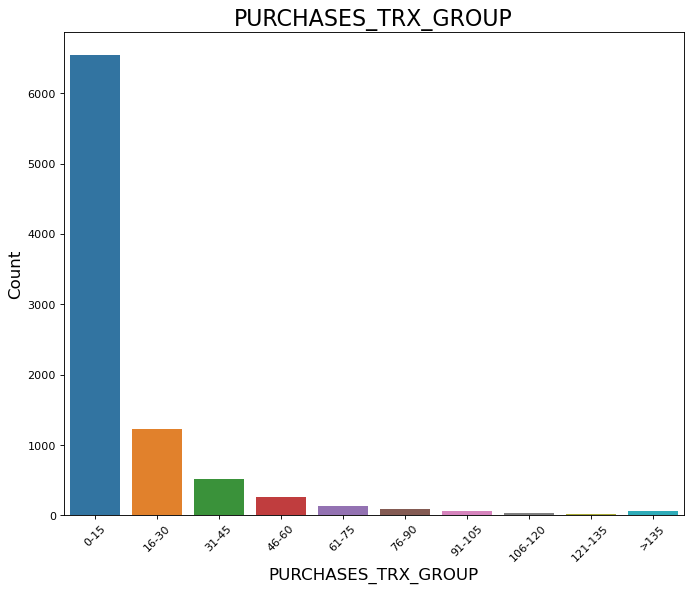

In [112]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df['PURCHASES_TRX_GROUP'])
plt.title('PURCHASES_TRX_GROUP', size =20)
plt.xlabel("PURCHASES_TRX_GROUP",size = 15)
plt.ylabel("Count", size = 15)
plt.xticks(rotation=45)
plt.show()

- Most customers (73%) made 0-15 purchases transaction 

#### CREDIT_LIMIT

In [113]:
df['CREDIT_LIMIT_GROUP'].value_counts()

0-2000         2990
2001-4000      2372
4001-6000      1316
6001-8000       980
8001-10000      604
10001-12000     320
12001-14000     153
14001-16000      95
16001-18000      76
18001-20000      30
>20000           13
Name: CREDIT_LIMIT_GROUP, dtype: int64

In [114]:
df['CREDIT_LIMIT_GROUP'].value_counts(normalize=True)

0-2000        0.33
2001-4000     0.27
4001-6000     0.15
6001-8000     0.11
8001-10000    0.07
10001-12000   0.04
12001-14000   0.02
14001-16000   0.01
16001-18000   0.01
18001-20000   0.00
>20000        0.00
Name: CREDIT_LIMIT_GROUP, dtype: float64

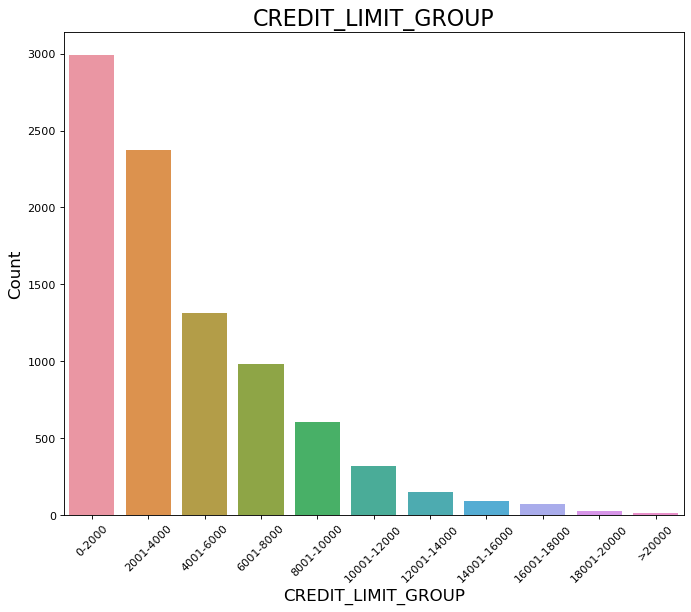

In [115]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df['CREDIT_LIMIT_GROUP'])
plt.title('CREDIT_LIMIT_GROUP', size =20)
plt.xlabel("CREDIT_LIMIT_GROUP",size = 15)
plt.ylabel("Count", size = 15)
plt.xticks(rotation=45)
plt.show()

- 33% of customer's credit limit are 0-2000 dollars

#### PAYMENTS

In [116]:
df['PAYMENTS_GROUP'].value_counts()

0-2000         6833
2001-4000      1245
4001-6000       409
6001-8000       186
8001-10000      105
10001-12000      60
>20000           45
12001-14000      28
14001-16000      16
16001-18000      12
18001-20000      10
Name: PAYMENTS_GROUP, dtype: int64

In [117]:
df['PAYMENTS_GROUP'].value_counts(normalize=True)

0-2000        0.76
2001-4000     0.14
4001-6000     0.05
6001-8000     0.02
8001-10000    0.01
10001-12000   0.01
>20000        0.01
12001-14000   0.00
14001-16000   0.00
16001-18000   0.00
18001-20000   0.00
Name: PAYMENTS_GROUP, dtype: float64

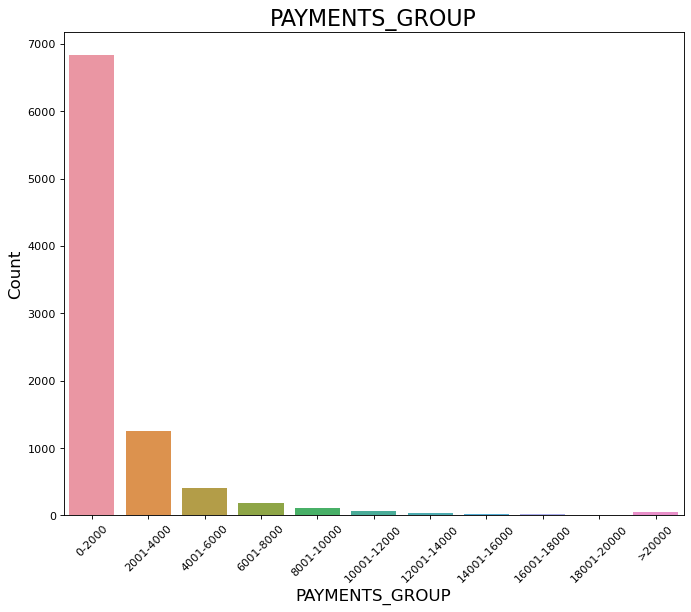

In [118]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df['PAYMENTS_GROUP'])
plt.title('PAYMENTS_GROUP', size =20)
plt.xlabel("PAYMENTS_GROUP",size = 15)
plt.ylabel("Count", size = 15)
plt.xticks(rotation=45)
plt.show()

- Most of customer's (76%) amount of payments done are 0-2000 dollars

#### MINIMUM_PAYMENTS

In [119]:
df['MIN_PAYMENTS_GROUP'].value_counts()

0-2000         8231
2001-4000       473
4001-6000        99
6001-8000        43
>20000           24
8001-10000       24
12001-14000      18
10001-12000      18
16001-18000       8
18001-20000       6
14001-16000       5
Name: MIN_PAYMENTS_GROUP, dtype: int64

In [120]:
df['MIN_PAYMENTS_GROUP'].value_counts(normalize=True)

0-2000        0.92
2001-4000     0.05
4001-6000     0.01
6001-8000     0.00
>20000        0.00
8001-10000    0.00
12001-14000   0.00
10001-12000   0.00
16001-18000   0.00
18001-20000   0.00
14001-16000   0.00
Name: MIN_PAYMENTS_GROUP, dtype: float64

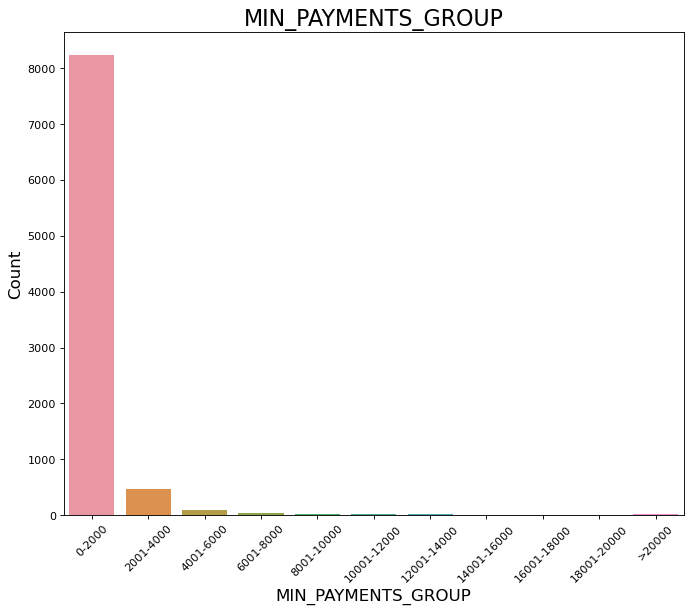

In [121]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df['MIN_PAYMENTS_GROUP'])
plt.title('MIN_PAYMENTS_GROUP', size =20)
plt.xlabel("MIN_PAYMENTS_GROUP",size = 15)
plt.ylabel("Count", size = 15)
plt.xticks(rotation=45)
plt.show()

- Most of customer's (92%) amount of minimum payments made are 0-2000 dollars

#### MINIMUM_PAYMENTS

In [122]:
df['PRC_FULL_PAYMENT_GROUP'].value_counts()

0-0.2       7066
0.81-1       722
0.21-0.4     496
0.41-0.6     379
0.61-0.8     286
Name: PRC_FULL_PAYMENT_GROUP, dtype: int64

In [123]:
df['PRC_FULL_PAYMENT_GROUP'].value_counts(normalize=True)

0-0.2      0.79
0.81-1     0.08
0.21-0.4   0.06
0.41-0.6   0.04
0.61-0.8   0.03
Name: PRC_FULL_PAYMENT_GROUP, dtype: float64

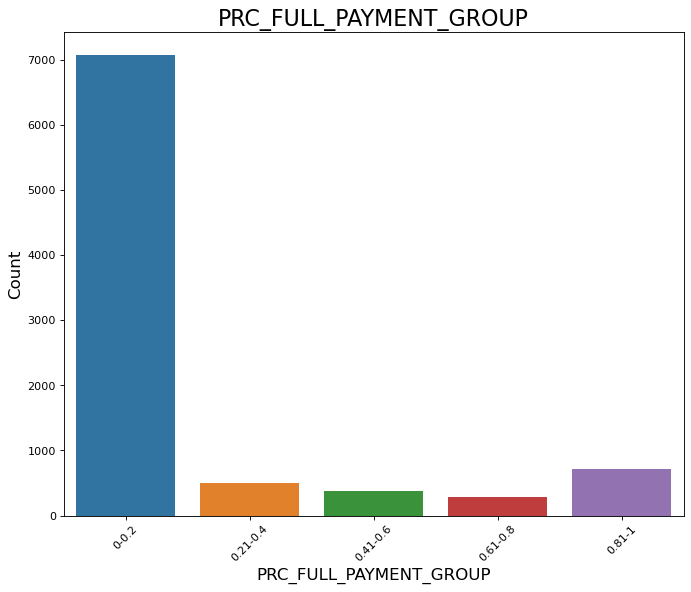

In [124]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df['PRC_FULL_PAYMENT_GROUP'])
plt.title('PRC_FULL_PAYMENT_GROUP', size =20)
plt.xlabel("PRC_FULL_PAYMENT_GROUP",size = 15)
plt.ylabel("Count", size = 15)
plt.xticks(rotation=45)
plt.show()

- 79% of customers Percentage of full payment paid are 0-0.2

#### TENURE

In [125]:
df['TENURE'].value_counts()

12    7584
11     365
10     236
6      203
8      196
7      190
9      175
Name: TENURE, dtype: int64

In [126]:
df['TENURE'].value_counts(normalize=True)

12   0.85
11   0.04
10   0.03
6    0.02
8    0.02
7    0.02
9    0.02
Name: TENURE, dtype: float64

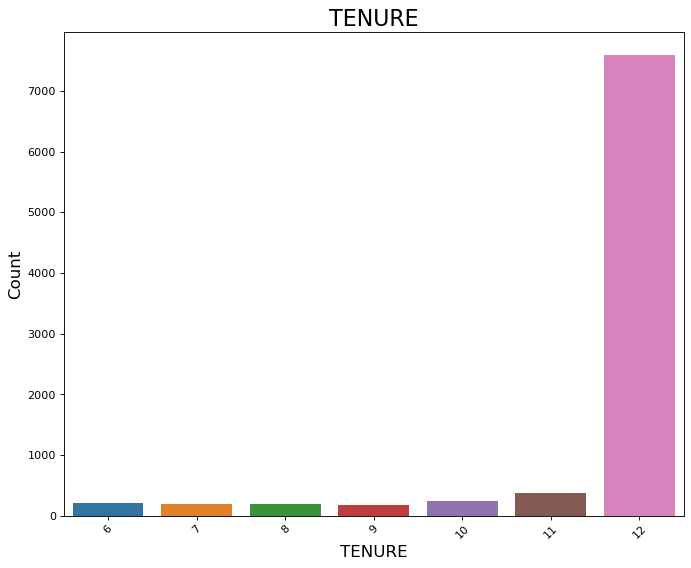

In [127]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df['TENURE'])
plt.title('TENURE', size =20)
plt.xlabel("TENURE",size = 15)
plt.ylabel("Count", size = 15)
plt.xticks(rotation=45)
plt.show()

- 85% of customers credit card tenure are 12 months

===================================================================================================================

### MULTIVARIATE ANALYSIS

#### BALANCE VS SEGMENT

In [128]:
df_bal = df.pivot_table(index='SEGMENT', values='BALANCE', aggfunc='mean').sort_values('BALANCE', ascending=False).reset_index()
df_bal

,SEGMENT,BALANCE
0,2,5489.73
1,1,2174.54
2,0,805.20


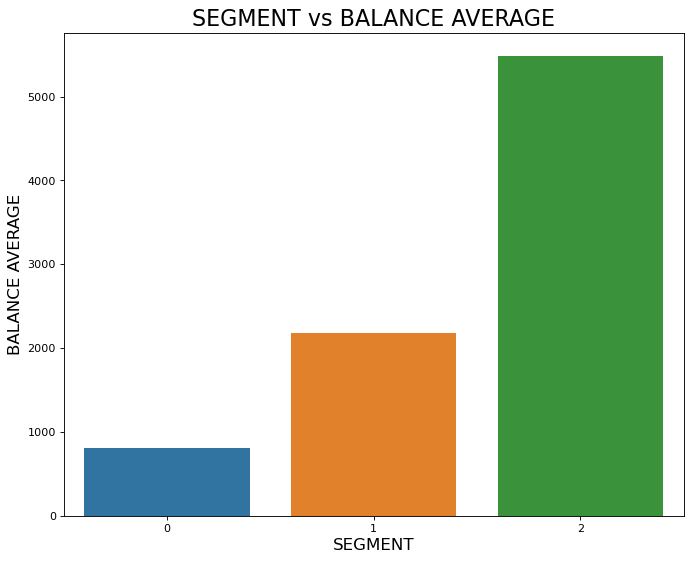

In [129]:
plt.figure(figsize=(10,8), dpi = 80)
sns.barplot(x= 'SEGMENT' , y = 'BALANCE', data = df_bal, estimator=sum)
plt.title('SEGMENT vs BALANCE AVERAGE', size =20)
plt.xlabel("SEGMENT",size = 15)
plt.ylabel("BALANCE AVERAGE", size = 15)
plt.show()

In [130]:
pd.crosstab(index = df['BALANCE_GROUP'], columns = df['SEGMENT'], normalize = 'index')

SEGMENT,0,1,2
BALANCE_GROUP,,,
0-2000,0.76,0.22,0.02
2001-4000,0.43,0.50,0.07
4001-6000,0.00,0.80,0.20
6001-8000,0.00,0.43,0.57
8001-10000,0.00,0.02,0.98
>10001,0.00,0.00,1.00


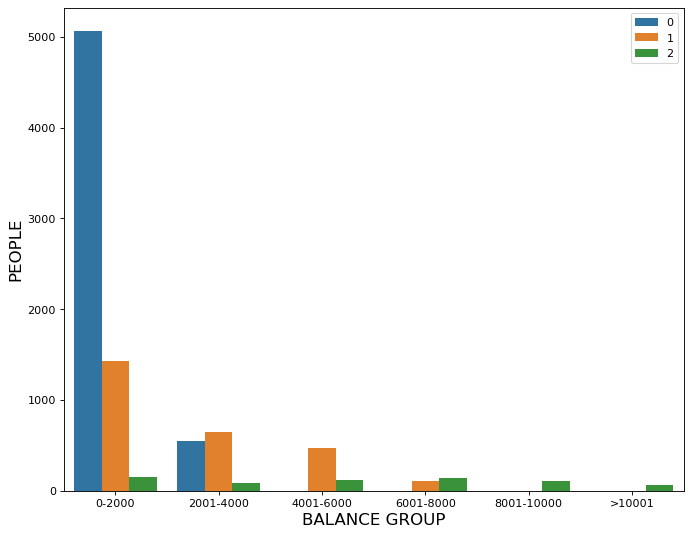

In [131]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot('BALANCE_GROUP', data = df, hue = 'SEGMENT')
plt.xlabel("BALANCE GROUP",size = 15)
plt.ylabel("PEOPLE", size = 15)
plt.legend(loc='upper right')
plt.show()

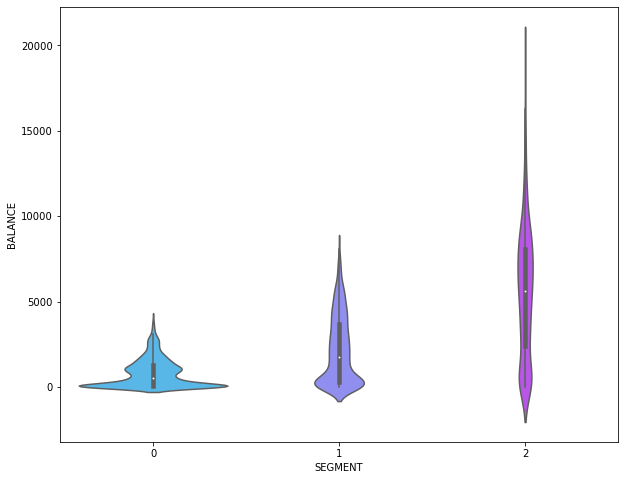

In [132]:
plt.figure(figsize=(10,8))
sns.violinplot(x = 'SEGMENT', y = 'BALANCE', palette='cool', data=df)
plt.show()

- SEGMENT 2 customer's AVERAGE BALANCE are 5489.73 dollars
- SEGMENT 1 customer's AVERAGE BALANCE are 2174.54 dollars
- SEGMENT 0 customer's AVERAGE BALANCE are 805.2 dollars
- SEGMENT 2 customer's BALANCE RANGE is 0 - >10001 dollars
- SEGMENT 1 customer's BALANCE RANGE is 0 - 8000 dollars
- SEGMENT 0 customer's BALANCE RANGE is 0 - 4000 dollars

#### PURCHASES VS SEGMENT

In [133]:
df_pur = df.pivot_table(index='SEGMENT', values='PURCHASES', aggfunc='mean').sort_values('PURCHASES', ascending=False).reset_index()
df_pur

,SEGMENT,PURCHASES
0,2,3681.10
1,1,1285.08
2,0,548.64


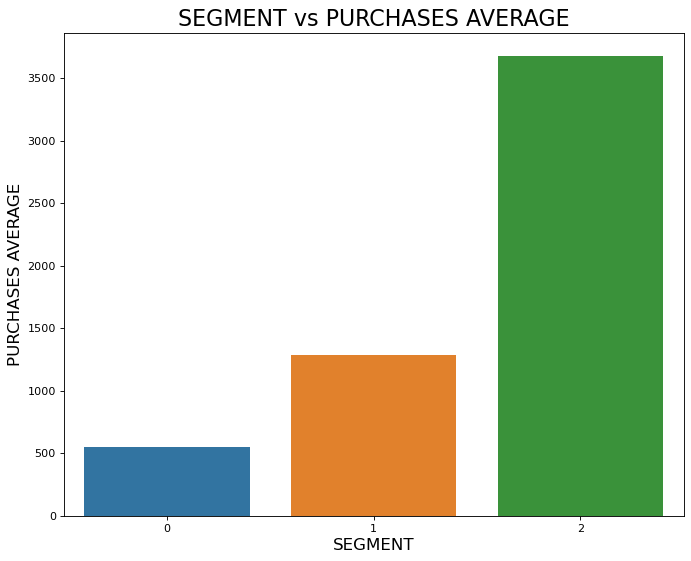

In [134]:
plt.figure(figsize=(10,8), dpi = 80)
sns.barplot(x= 'SEGMENT' , y = 'PURCHASES', data = df_pur, estimator=sum)
plt.title('SEGMENT vs PURCHASES AVERAGE', size =20)
plt.xlabel("SEGMENT",size = 15)
plt.ylabel("PURCHASES AVERAGE", size = 15)
plt.show()

In [135]:
pd.crosstab(index = df['PURCHASES_GROUP'], columns = df['SEGMENT'], normalize = 'index')

SEGMENT,0,1,2
PURCHASES_GROUP,,,
0-2000,0.69,0.27,0.05
2001-4000,0.35,0.52,0.13
4001-6000,0.16,0.53,0.31
6001-8000,0.09,0.43,0.48
8001-10000,0.04,0.39,0.57
>10001,0.00,0.14,0.86


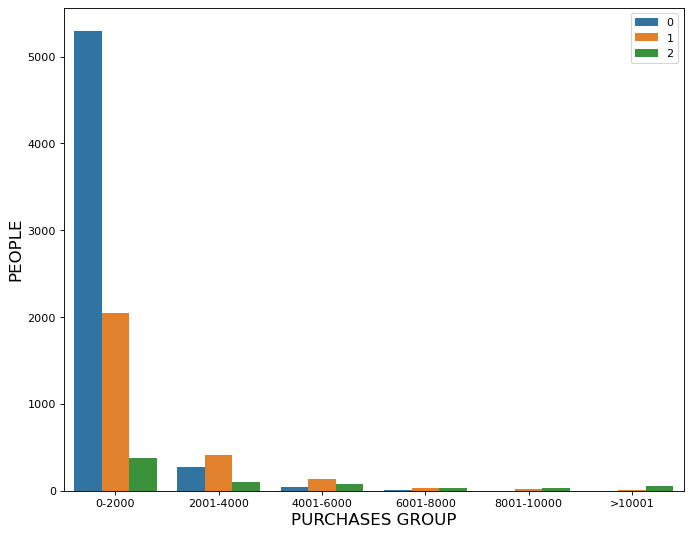

In [136]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot('PURCHASES_GROUP', data = df, hue = 'SEGMENT')
plt.xlabel("PURCHASES GROUP",size = 15)
plt.ylabel("PEOPLE", size = 15)
plt.legend(loc='upper right')
plt.show()

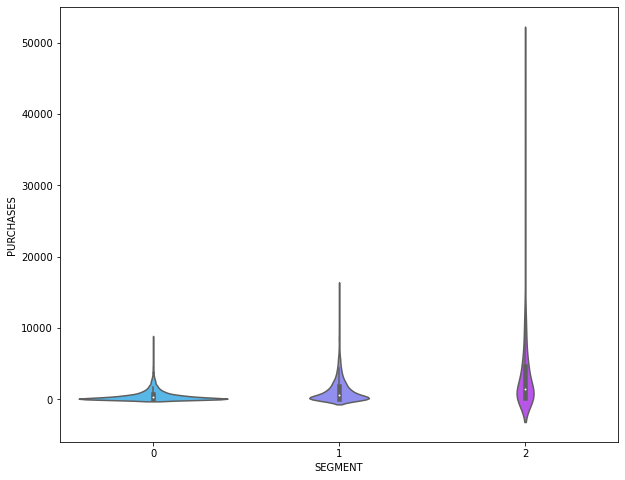

In [137]:
plt.figure(figsize=(10,8))
sns.violinplot(x = 'SEGMENT', y = 'PURCHASES', palette='cool', data=df)
plt.show()

- SEGMENT 2 customer's AVERAGE PURCHASES are 14927.14
- SEGMENT 1 customer's AVERAGE PURCHASES are 1320.44
- SEGMENT 0 customer's AVERAGE PURCHASES are 791.53
- SEGMENT 2 customer's PURCHASES RANGE is 0 - >10001 dollars
- SEGMENT 1 customer's PURCHASES RANGE is 0 - >10001 dollars
- SEGMENT 0 customer's PURCHASES RANGE is 0 - 8000 dollars

#### ONEOFF PURCHASES VS SEGMENT

In [138]:
df_oneoffpur = df.pivot_table(index='SEGMENT', values='ONEOFF_PURCHASES', aggfunc='mean').sort_values('ONEOFF_PURCHASES', ascending=False).reset_index()
df_oneoffpur

,SEGMENT,ONEOFF_PURCHASES
0,2,2456.43
1,1,790.36
2,0,275.20


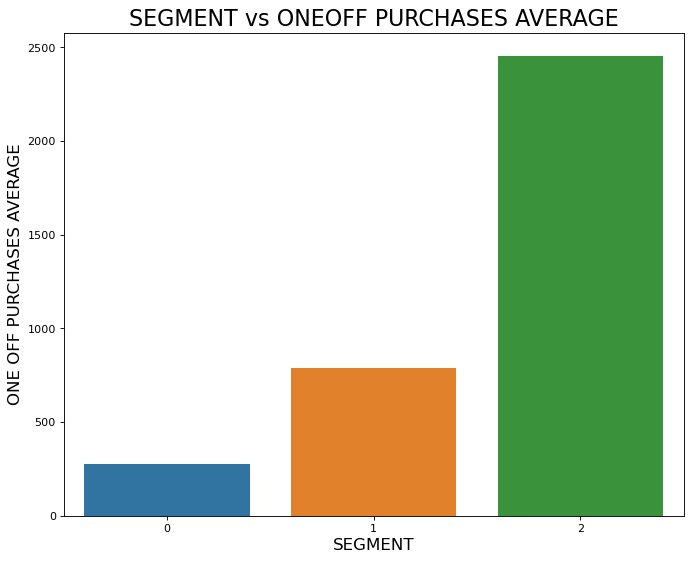

In [139]:
plt.figure(figsize=(10,8), dpi = 80)
sns.barplot(x= 'SEGMENT' , y = 'ONEOFF_PURCHASES', data = df_oneoffpur, estimator=sum)
plt.title('SEGMENT vs ONEOFF PURCHASES AVERAGE', size =20)
plt.xlabel("SEGMENT",size = 15)
plt.ylabel("ONE OFF PURCHASES AVERAGE", size = 15)
plt.show()

In [140]:
pd.crosstab(index = df['ONEOFF_PURCHASES_GROUP'], columns = df['SEGMENT'], normalize = 'index')

SEGMENT,0,1,2
ONEOFF_PURCHASES_GROUP,,,
0-2000,0.66,0.28,0.05
2001-4000,0.27,0.50,0.23
4001-6000,0.14,0.52,0.34
6001-8000,0.04,0.38,0.58
8001-10000,0.10,0.19,0.71
>10001,0.00,0.15,0.85


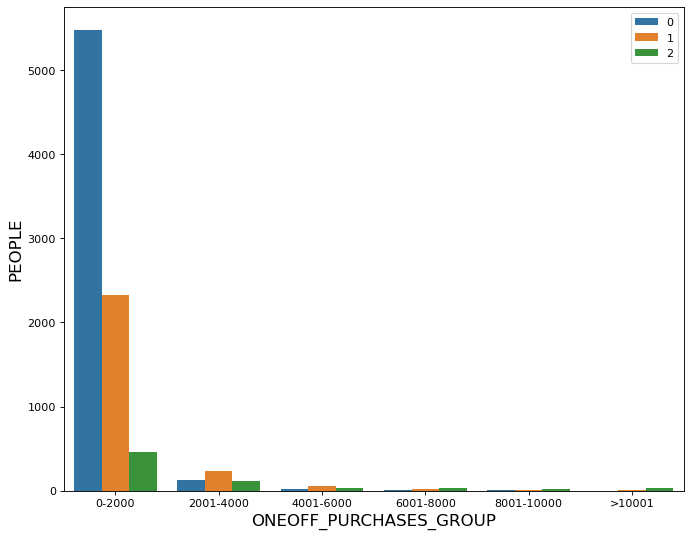

In [141]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot('ONEOFF_PURCHASES_GROUP', data = df, hue = 'SEGMENT')
plt.xlabel("ONEOFF_PURCHASES_GROUP",size = 15)
plt.ylabel("PEOPLE", size = 15)
plt.legend(loc='upper right')
plt.show()

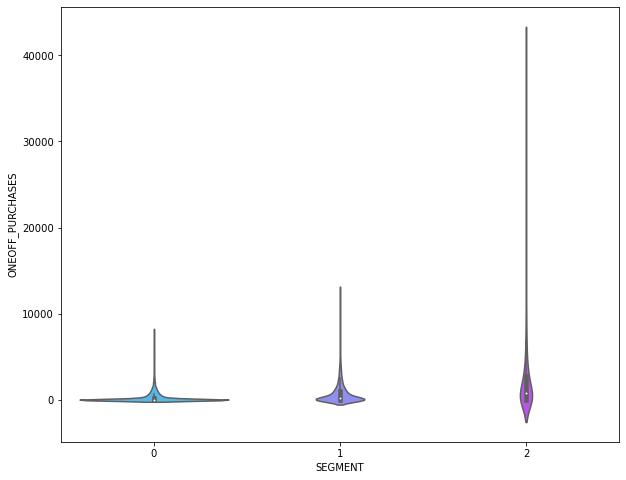

In [142]:
plt.figure(figsize=(10,8))
sns.violinplot(x = 'SEGMENT', y = 'ONEOFF_PURCHASES', palette='cool', data=df)
plt.show()

- SEGMENT 2 customer's average ONEOFF_PURCHASES are 12487.68
- SEGMENT 1 customer's average ONEOFF_PURCHASES are 734.17
- SEGMENT 0 customer's average ONEOFF_PURCHASES are 433.49
- SEGMENT 2 customer's ONEOFF_PURCHASES RANGE is 0 - >10001 dollars
- SEGMENT 1 customer's ONEOFF_PURCHASES RANGE is 0 - >10001 dollars
- SEGMENT 0 customer's ONEOFF_PURCHASES RANGE is 0 - 10000 dollars

#### INSTALLMENT PURCHASES VS SEGMENT

In [143]:
df_installpur = df.pivot_table(index='SEGMENT', values='INSTALLMENTS_PURCHASES', aggfunc='mean').sort_values('INSTALLMENTS_PURCHASES', ascending=False).reset_index()
df_installpur

,SEGMENT,INSTALLMENTS_PURCHASES
0,2,1224.80
1,1,495.08
2,0,273.73


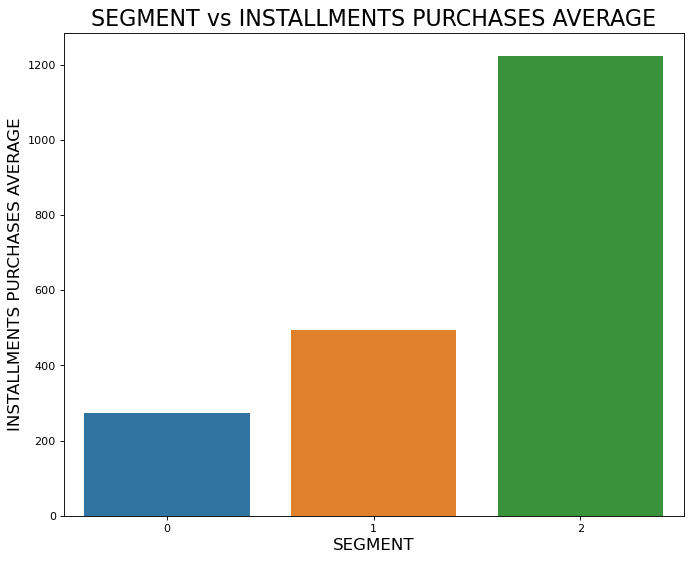

In [144]:
plt.figure(figsize=(10,8), dpi = 80)
sns.barplot(x= 'SEGMENT' , y = 'INSTALLMENTS_PURCHASES', data = df_installpur, estimator=sum)
plt.title('SEGMENT vs INSTALLMENTS PURCHASES AVERAGE', size =20)
plt.xlabel("SEGMENT",size = 15)
plt.ylabel("INSTALLMENTS PURCHASES AVERAGE", size = 15)
plt.show()

In [145]:
pd.crosstab(index = df['INSTALLMENTS_PURCHASES_GROUP'], columns = df['SEGMENT'], normalize = 'index')

SEGMENT,0,1,2
INSTALLMENTS_PURCHASES_GROUP,,,
0-2000,0.64,0.29,0.07
2001-4000,0.28,0.49,0.23
4001-6000,0.09,0.35,0.57
6001-8000,0.00,0.42,0.58
8001-10000,0.00,0.00,1.00
>10001,0.00,0.00,1.00


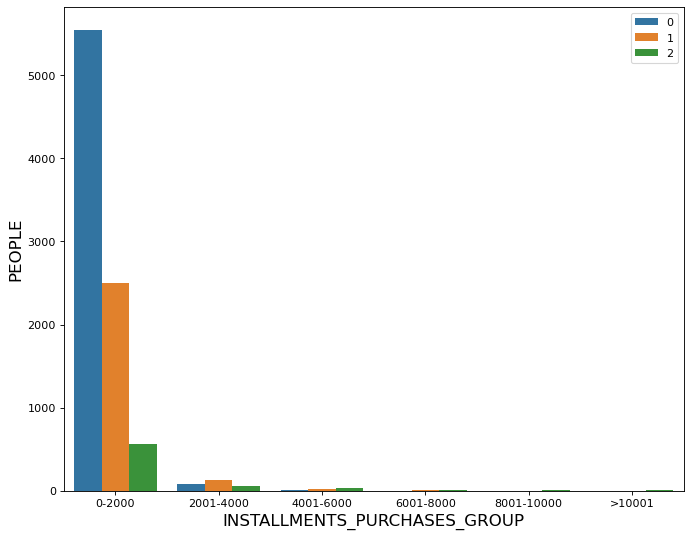

In [146]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot('INSTALLMENTS_PURCHASES_GROUP', data = df, hue = 'SEGMENT')
plt.xlabel("INSTALLMENTS_PURCHASES_GROUP",size = 15)
plt.ylabel("PEOPLE", size = 15)
plt.legend(loc='upper right')
plt.show()

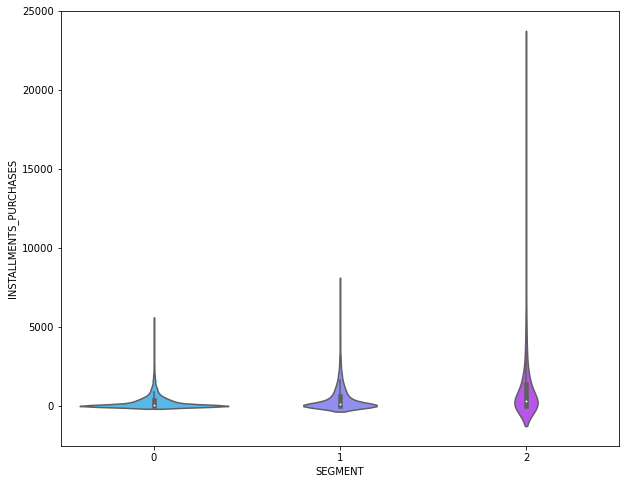

In [147]:
plt.figure(figsize=(10,8))
sns.violinplot(x = 'SEGMENT', y = 'INSTALLMENTS_PURCHASES', palette='cool', data=df)
plt.show()

- SEGMENT 2 customer's average INSTALLMENT_PURCHASES are 2439.46
- SEGMENT 1 customer's average INSTALLMENT_PURCHASES are 586.33
- SEGMENT 0 customer's average INSTALLMENT_PURCHASES are 358.38
- SEGMENT 2 customer's INSTALLMENT_PURCHASES RANGE is 0 - >10001 dollars
- SEGMENT 1 customer's INSTALLMENT_PURCHASES RANGE is 0 - 8000 dollars
- SEGMENT 0 customer's INSTALLMENT_PURCHASES RANGE is 0 - 6000 dollars

#### CASH ADVANCE VS SEGMENT

In [148]:
df_cashadv = df.pivot_table(index='SEGMENT', values='CASH_ADVANCE', aggfunc='mean').sort_values('CASH_ADVANCE', ascending=False).reset_index()
df_cashadv

,SEGMENT,CASH_ADVANCE
0,2,2812.31
1,1,1478.64
2,0,522.79


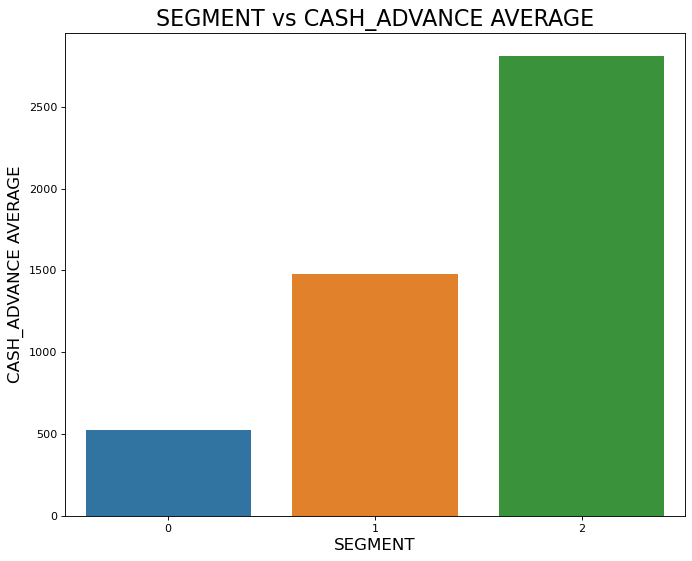

In [149]:
plt.figure(figsize=(10,8), dpi = 80)
sns.barplot(x= 'SEGMENT' , y = 'CASH_ADVANCE', data = df_cashadv, estimator=sum)
plt.title('SEGMENT vs CASH_ADVANCE AVERAGE', size =20)
plt.xlabel("SEGMENT",size = 15)
plt.ylabel("CASH_ADVANCE AVERAGE", size = 15)
plt.show()

In [150]:
pd.crosstab(index = df['CASH_ADVANCE_GROUP'], columns = df['SEGMENT'], normalize = 'index')

SEGMENT,0,1,2
CASH_ADVANCE_GROUP,,,
0-2000,0.69,0.26,0.05
2001-4000,0.42,0.47,0.11
4001-6000,0.19,0.56,0.25
6001-8000,0.08,0.64,0.28
8001-10000,0.00,0.67,0.33
>10001,0.05,0.39,0.56


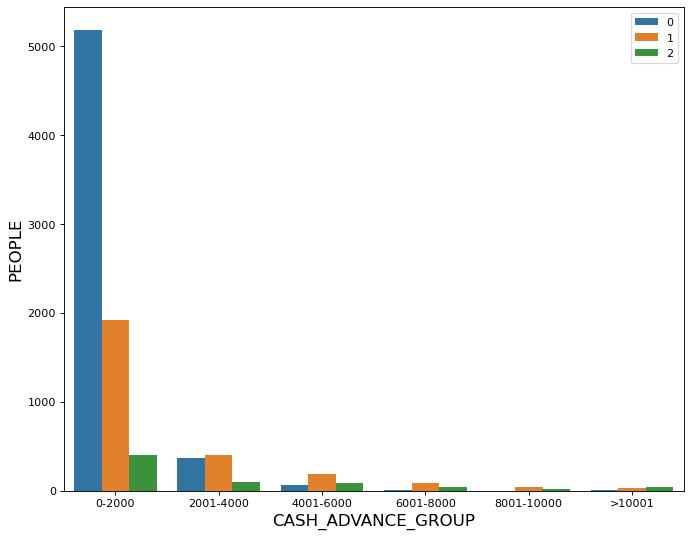

In [151]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot('CASH_ADVANCE_GROUP', data = df, hue = 'SEGMENT')
plt.xlabel("CASH_ADVANCE_GROUP",size = 15)
plt.ylabel("PEOPLE", size = 15)
plt.legend(loc='upper right')
plt.show()

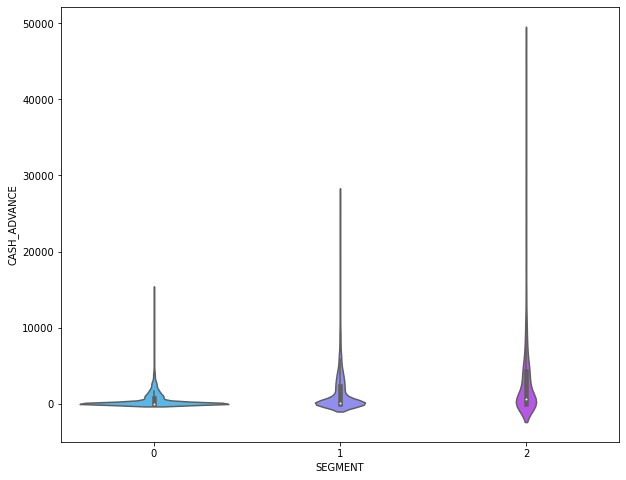

In [152]:
plt.figure(figsize=(10,8))
sns.violinplot(x = 'SEGMENT', y = 'CASH_ADVANCE', palette='cool', data=df)
plt.show()

- SEGMENT 2 customer's AVERAGE CASH_ADVANCE are 2439.46
- SEGMENT 1 customer's AVERAGE CASH_ADVANCE are 586.33
- SEGMENT 0 customer's AVERAGE CASH_ADVANCE are 358.38
- SEGMENT 2 customer's CASH_ADVANCE RANGE is 0 - >10001 dollars
- SEGMENT 1 customer's CASH_ADVANCE RANGE is 0 - >10001 dollars
- SEGMENT 0 customer's CASH_ADVANCE RANGE is 0 - >10001 dollars

#### CREDIT_LIMIT VS SEGMENT

In [153]:
df_cl = df.pivot_table(index='SEGMENT', values='CREDIT_LIMIT', aggfunc='mean').sort_values('CREDIT_LIMIT', ascending=False).reset_index()
df_cl

,SEGMENT,CREDIT_LIMIT
0,2,13185.56
1,1,7041.03
2,0,2247.99


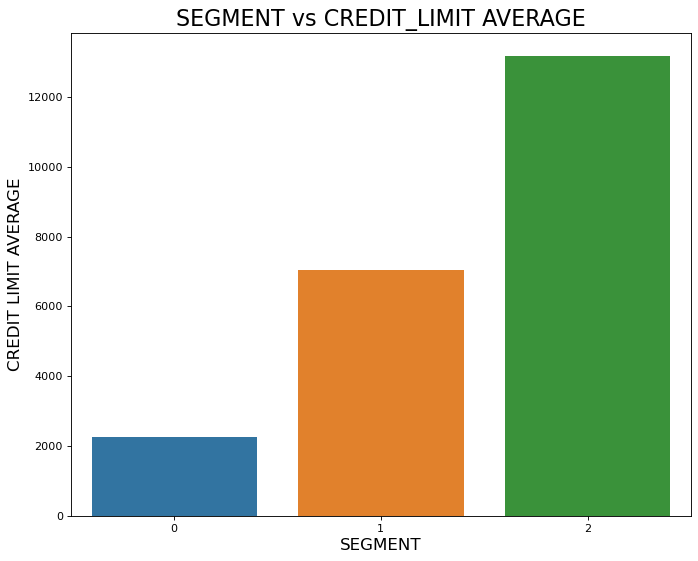

In [154]:
plt.figure(figsize=(10,8), dpi = 80)
sns.barplot(x= 'SEGMENT' , y = 'CREDIT_LIMIT', data = df_cl, estimator=sum)
plt.title('SEGMENT vs CREDIT_LIMIT AVERAGE', size =20)
plt.xlabel("SEGMENT",size = 15)
plt.ylabel("CREDIT LIMIT AVERAGE", size = 15)
plt.show()

In [155]:
pd.crosstab(index = df['CREDIT_LIMIT_GROUP'], columns = df['SEGMENT'], normalize = 'index')

SEGMENT,0,1,2
CREDIT_LIMIT_GROUP,,,
0-2000,1.00,0.00,0.00
2001-4000,0.99,0.01,0.00
4001-6000,0.21,0.79,0.00
6001-8000,0.00,0.99,0.01
8001-10000,0.00,0.82,0.18
10001-12000,0.00,0.37,0.63
12001-14000,0.00,0.07,0.93
14001-16000,0.00,0.00,1.00
16001-18000,0.00,0.00,1.00


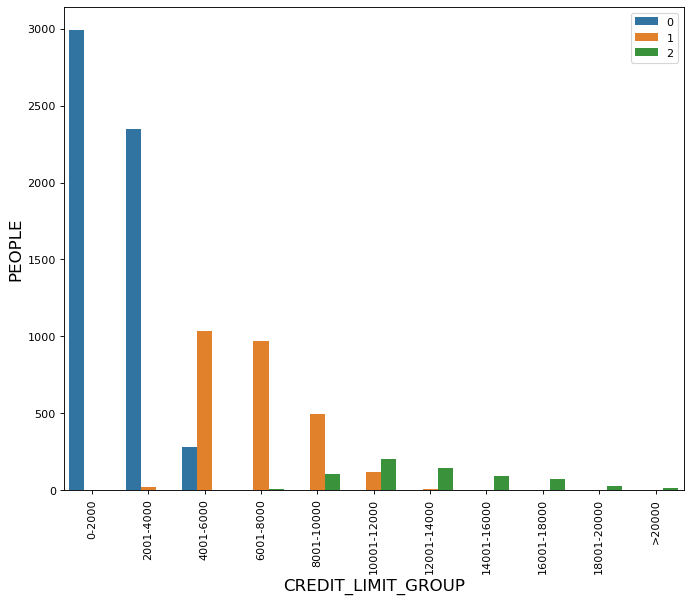

In [156]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot('CREDIT_LIMIT_GROUP', data = df, hue = 'SEGMENT')
plt.xlabel("CREDIT_LIMIT_GROUP",size = 15)
plt.ylabel("PEOPLE", size = 15)
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.show()

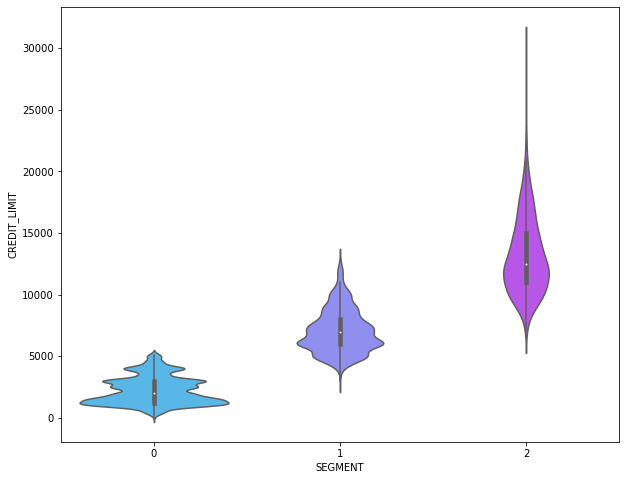

In [157]:
plt.figure(figsize=(10,8))
sns.violinplot(x = 'SEGMENT', y = 'CREDIT_LIMIT', palette='cool', data=df)
plt.show()

- SEGMENT 2 customer's AVERAGE CREDIT_LIMIT are 11041.28
- SEGMENT 1 customer's AVERAGE CREDIT_LIMIT are 8661.60
- SEGMENT 0 customer's AVERAGE CREDIT_LIMIT are 3713.53
- SEGMENT 2 customer's CREDIT_LIMIT RANGE is 6000 - >20001 dollars
- SEGMENT 1 customer's CREDIT_LIMIT RANGE is 2000 - 14000 dollars
- SEGMENT 0 customer's CREDIT_LIMIT RANGE is 0 - 6000 dollars

#### PAYMENTS VS SEGMENT

In [158]:
df_pay = df.pivot_table(index='SEGMENT', values='PAYMENTS', aggfunc='mean').sort_values('PAYMENTS', ascending=False).reset_index()
df_pay

,SEGMENT,PAYMENTS
0,2,5445.32
1,1,2335.63
2,0,1003.07


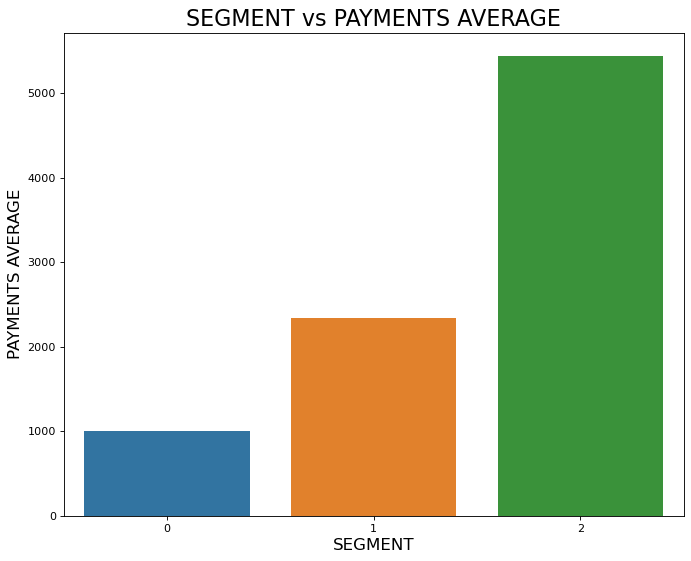

In [159]:
plt.figure(figsize=(10,8), dpi = 80)
sns.barplot(x= 'SEGMENT' , y = 'PAYMENTS', data = df_pay, estimator=sum)
plt.title('SEGMENT vs PAYMENTS AVERAGE', size =20)
plt.xlabel("SEGMENT",size = 15)
plt.ylabel("PAYMENTS AVERAGE", size = 15)
plt.show()

In [160]:
pd.crosstab(index = df['PAYMENTS_GROUP'], columns = df['SEGMENT'], normalize = 'index')

SEGMENT,0,1,2
PAYMENTS_GROUP,,,
0-2000,0.71,0.25,0.03
2001-4000,0.45,0.39,0.16
4001-6000,0.32,0.51,0.17
6001-8000,0.14,0.63,0.23
8001-10000,0.14,0.56,0.30
10001-12000,0.05,0.43,0.52
12001-14000,0.14,0.29,0.57
14001-16000,0.06,0.44,0.50
16001-18000,0.00,0.25,0.75


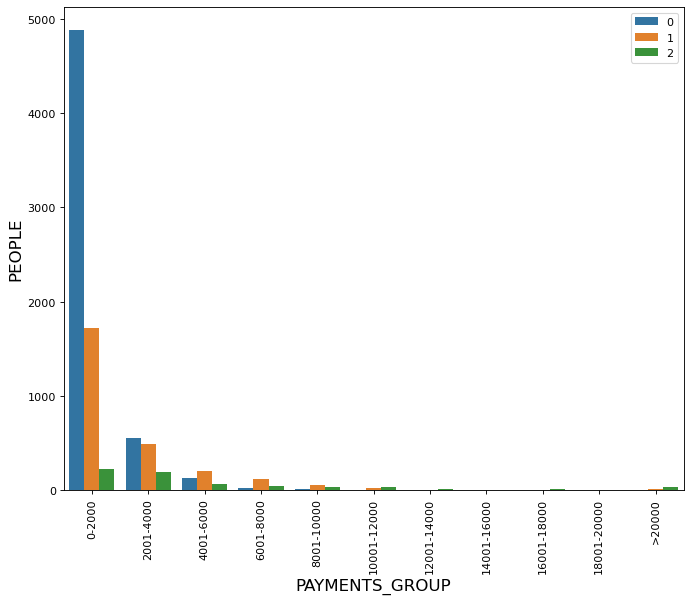

In [161]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot('PAYMENTS_GROUP', data = df, hue = 'SEGMENT')
plt.xlabel("PAYMENTS_GROUP",size = 15)
plt.ylabel("PEOPLE", size = 15)
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.show()

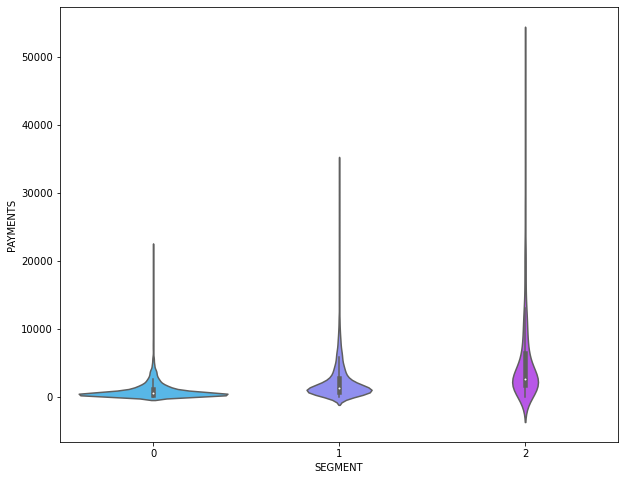

In [162]:
plt.figure(figsize=(10,8))
sns.violinplot(x = 'SEGMENT', y = 'PAYMENTS', palette='cool', data=df)
plt.show()

- SEGMENT 2 customer's AVERAGE PAYMENTS are 13622.30
- SEGMENT 1 customer's AVERAGE PAYMENTS are 3216.83
- SEGMENT 0 customer's AVERAGE PAYMENTS are 1346.86
- SEGMENT 2 customer's PAYMENTS RANGE is 0 - >20001 dollars
- SEGMENT 1 customer's PAYMENTS RANGE is 0 - >20001 dollars
- SEGMENT 0 customer's PAYMENTS RANGE is 0 - >20001 dollars

#### MIN_PAYMENTS VS SEGMENT

In [163]:
df_minpay = df.pivot_table(index='SEGMENT', values='MINIMUM_PAYMENTS', aggfunc='mean').sort_values('MINIMUM_PAYMENTS', ascending=False).reset_index()
df_minpay

,SEGMENT,MINIMUM_PAYMENTS
0,2,2257.82
1,1,980.30
2,0,611.97


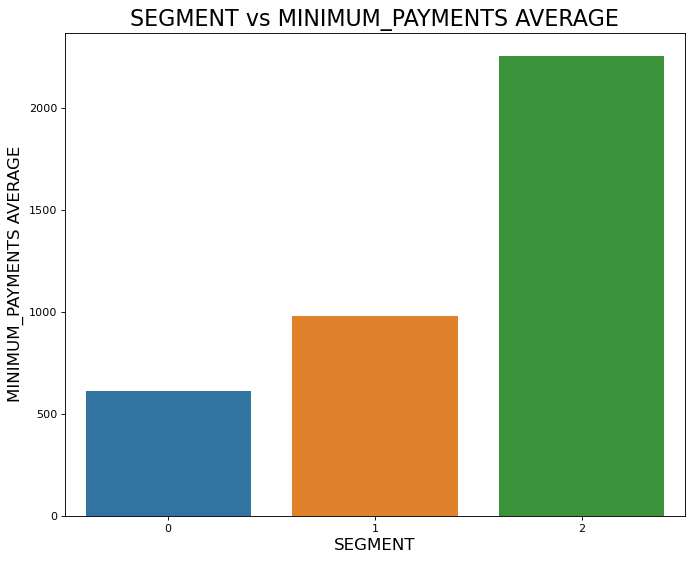

In [164]:
plt.figure(figsize=(10,8), dpi = 80)
sns.barplot(x= 'SEGMENT' , y = 'MINIMUM_PAYMENTS', data = df_minpay, estimator=sum)
plt.title('SEGMENT vs MINIMUM_PAYMENTS AVERAGE', size =20)
plt.xlabel("SEGMENT",size = 15)
plt.ylabel("MINIMUM_PAYMENTS AVERAGE", size = 15)
plt.show()

In [165]:
pd.crosstab(index = df['MIN_PAYMENTS_GROUP'], columns = df['SEGMENT'], normalize = 'index')

SEGMENT,0,1,2
MIN_PAYMENTS_GROUP,,,
0-2000,0.65,0.29,0.05
2001-4000,0.27,0.37,0.36
4001-6000,0.38,0.26,0.35
6001-8000,0.42,0.26,0.33
8001-10000,0.58,0.08,0.33
10001-12000,0.61,0.22,0.17
12001-14000,0.67,0.28,0.06
14001-16000,0.60,0.20,0.20
16001-18000,0.75,0.12,0.12


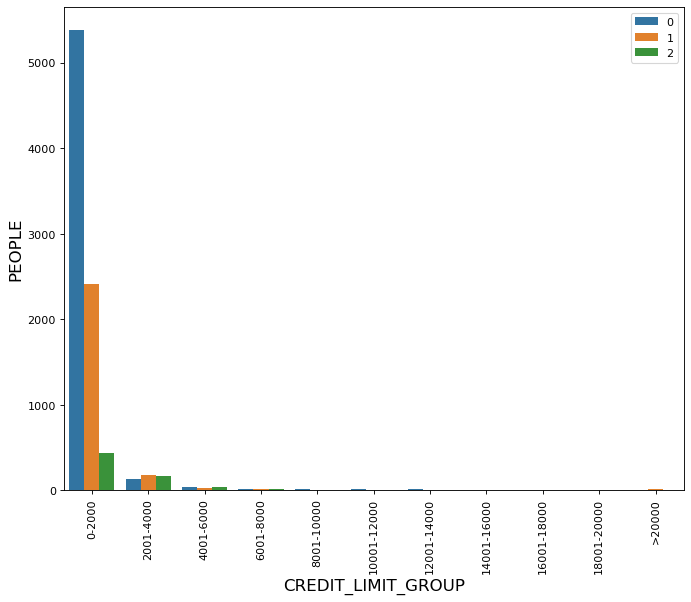

In [166]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot('MIN_PAYMENTS_GROUP', data = df, hue = 'SEGMENT')
plt.xlabel("CREDIT_LIMIT_GROUP",size = 15)
plt.ylabel("PEOPLE", size = 15)
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.show()

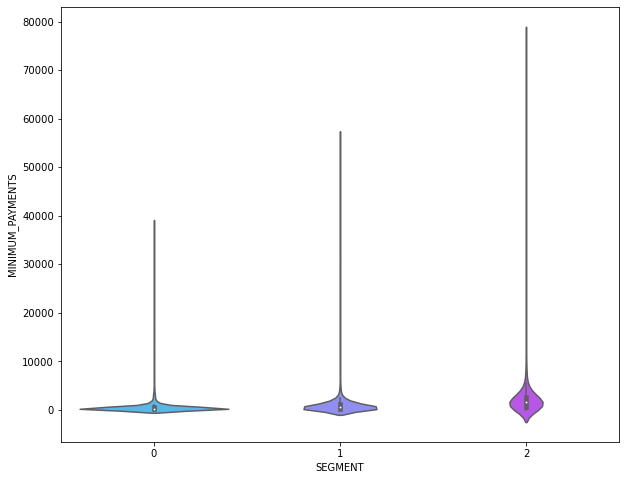

In [167]:
plt.figure(figsize=(10,8))
sns.violinplot(x = 'SEGMENT', y = 'MINIMUM_PAYMENTS', palette='cool', data=df)
plt.show()

- Segment 2 customer's AVERAGE MINIMUM PAYMENTS are 2631.86
- Segment 1 customer's AVERAGE MINIMUM PAYMENTS are 1718.09
- Segment 0 customer's AVERAGE MINIMUM PAYMENTS are 532.50
- SEGMENT 2 customer's MINIMUM_PAYMENTS RANGE is 0 - >20001 dollars
- SEGMENT 1 customer's MINIMUM_PAYMENTS RANGE is 0 - >20001 dollars
- SEGMENT 0 customer's MINIMUM_PAYMENTS RANGE is 0 - >20001 dollars

# DATA INSIGHT

- Majority Customers (80%) are frequently updating their Credit Card Balance (0.81-1)
- Majority Customer's (86%) amount of purchases made are around 0-2000 dollars
- Majority Customer's (92%) amount of purchases made in one-go are around 0-2000 dollars
- Majority Customer's (96%) amount of purchases done in installment are around 0-2000 dollars
- Majority Customer's (84%) cash in advance are around 0-2000 dollars
- 37% customers rarely use credit card to made purchase (0-0.2 frequently)
- 35% customers frequent use credit card to made purchase (0.81-1 frequently)
- Most customers (70%) rarely use credit card to made purchase in one-go (0-0.2 frequently)
- Most customers (51%) rarely do made purchases in installments (0-0.2 frequently)
- Most customers (75%) rarely pay the cash in advance (0-0.2 frequently)
- Most customers (81%) made 0-5 transaction with "Cash in Advance"
- Most customers (73%) made 0-15 purchases transaction 
- 33% of customer's credit limit are 0-2000 dollars
- Most of customer's (76%) amount of payments done are 0-2000 dollars
- Most of customer's (92%) amount of minimum payments made are 0-2000 dollars
- 79% of customers Percentage of full payment paid are 0-0.2
- 85% of customers credit card tenure are 12 months

# SUMMARY

- **BALANCE** has low impact to SEGMENT
- **PURCHASES** has low impact to SEGMENT
- **ONEOFF_PURCHASES** has low impact to SEGMENT
- **INSTALLMENT_PURCHASES** has low impact to SEGMENT
- **CASH_ADVANCE_PURCHASES** has low impact to SEGMENT
- **CREDIT_LIMIT** has significant impact to SEGMENT
- **PAYMENTS** has low impact to SEGMENT
- **MINIMUM_PAYMENTS** has low impact to SEGMENT
- Customer SEGMENTATION influenced by many Features

# RECOMMENDATION

- Based on our analysis, we recommend to use **all features for Machine Learning**